# Enhanced Epileptic Seizure Detection Using Machine Learning (COM726 AE2)

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d|ice|');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #818286; font-family: 'Roboto';}
span {font-family:'Roboto'; color:black; text-shadow: 5px 5px 5px #aaa;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:lightblue;}      
</style>

# 1. Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# 2. Load the Dataset

In [3]:
ESR = pd.read_csv('epileptic_seizure_data.csv')

# 3. Read and Show Dataset

The original dataset outlined in the source comprises five distinct directories, each housing 100 files, with each file corresponding to an individual subject. Each file documents brain activity for a duration of 23.6 seconds.

The sequential data series is divided into 4097 data points, each representing an EEG recording at a specific moment in time. As a result, there are a total of 500 individuals, each associated with 4097 data points encompassing 23.5 seconds.

To manage the data effectively, the 4097 data points are partitioned into 23 segments, with each segment containing 178 data points, equivalent to a 1-second interval. Every data point within these segments denotes the EEG recording at different time instances.

Consequently, the dataset now comprises 11,500 data pieces (rows), each containing 178 data points representing a 1-second interval. The final column serves as the 'y' label, encompassing values {1, 2, 3, 4, 5}. The 'y' column, located in position 179, denotes the response variable, while the explanatory variables range from X1 to X178.

## 3.1 Initial Dataset Overview

In [4]:
ESR.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [5]:
ESR.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,...,-59,-25,-4,2,5,4,-2,2,20,4


## 3.2 Exploratory Data Analysis (EDA) and Data Visualization

Exploratory Data Analysis (EDA) is a statistical approach used to understand and summarize the fundamental traits of datasets, often employing visual techniques. It doesn't necessarily rely on statistical modeling or hypothesis testing but focuses on extracting insights directly from the data.

EDA is similar to storytelling in statistics, allowing analysts to explore data, unveil patterns, and derive meaningful insights. It involves questioning the data and seeking validation through exploration. By conducting EDA, analysts aim to understand the data's underlying structure and characteristics without applying formal models or hypothesis testing.

In [6]:
ESR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [7]:
ESR.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [8]:
X = ESR.iloc[:,1:179].values
X.shape

(11500, 178)

Text(0.5, 0, 'Samples')

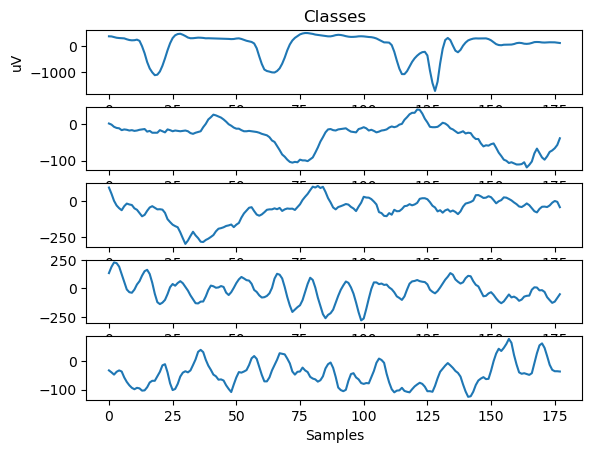

In [9]:
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(X[7,:])
plt.subplot(513)
plt.plot(X[12,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')

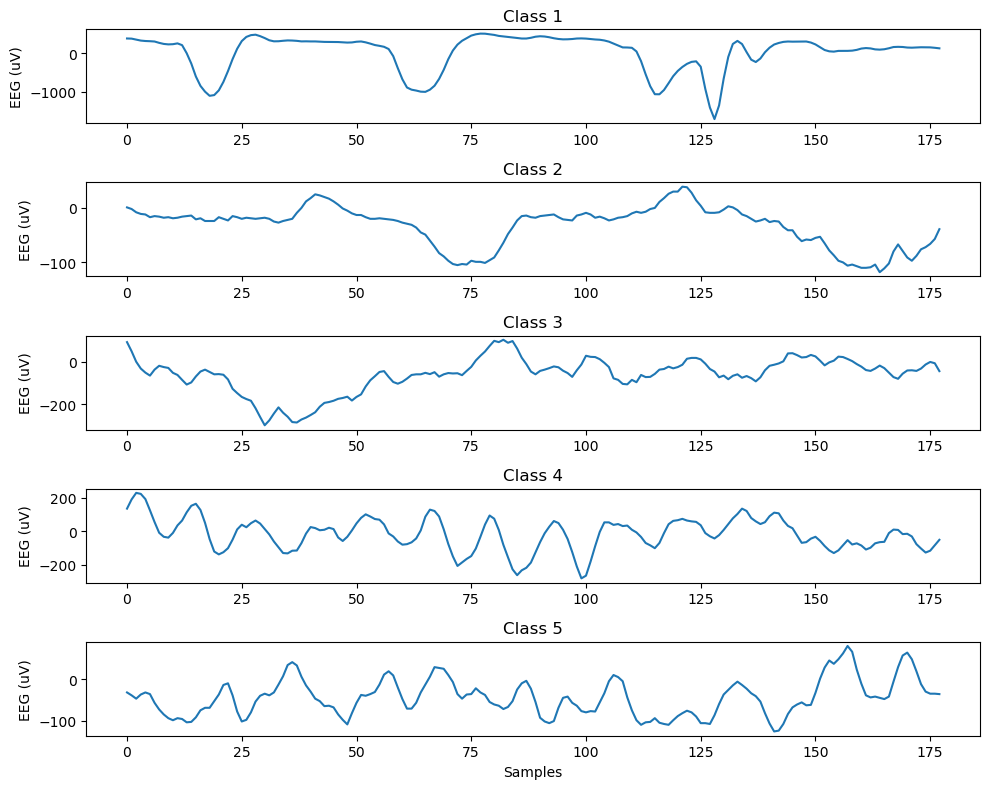

In [10]:
# Creating subplots for visualization
plt.figure(figsize=(10, 8))

# Plotting EEG data samples from different classes
plt.subplot(5, 1, 1)  # Subplot 1
plt.plot(X[1, :])
plt.title('Class 1')
plt.ylabel('EEG (uV)')

plt.subplot(5, 1, 2)  # Subplot 2
plt.plot(X[7, :])
plt.title('Class 2')
plt.ylabel('EEG (uV)')

plt.subplot(5, 1, 3)  # Subplot 3
plt.plot(X[12, :])
plt.title('Class 3')
plt.ylabel('EEG (uV)')

plt.subplot(5, 1, 4)  # Subplot 4
plt.plot(X[0, :])
plt.title('Class 4')
plt.ylabel('EEG (uV)')

plt.subplot(5, 1, 5)  # Subplot 5
plt.plot(X[2, :])
plt.title('Class 5')
plt.xlabel('Samples')
plt.ylabel('EEG (uV)')

plt.tight_layout()
plt.show()

Title: Variations in EEG Signal Patterns across Different Classes

Subplots Displaying EEG Data: The plot showcases EEG (Electroencephalogram) recordings from different classes, each represented in its respective subplot (Class 1 to Class 5).

EEG (uV): The 'uV' represents microvolts, which is the unit of measurement for the electrical voltage in EEG signals. It indicates the strength or intensity of the electrical activity recorded by the EEG device. Samples vs.

EEG Signal: On the x-axis, 'Samples' denotes individual data points sampled over time, while the y-axis 'EEG (uV)' signifies the magnitude of recorded electrical activity. Each line in the subplots represents the EEG signal's fluctuation over these samples for each class.

C:\Users\Gbenga\AppData\Local\Temp\ipykernel_3400\244871123.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(time_points[:len(class_1.mean(axis=0))], class_1.mean(axis=0), label='ictal (Class 1)')
C:\Users\Gbenga\AppData\Local\Temp\ipykernel_3400\244871123.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(time_points[:len(class_2.mean(axis=0))], class_2.mean(axis=0), label='Pre_ictal (Class 2)')
C:\Users\Gbenga\AppData\Local\Temp\ipykernel_3400\244871123.py:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only

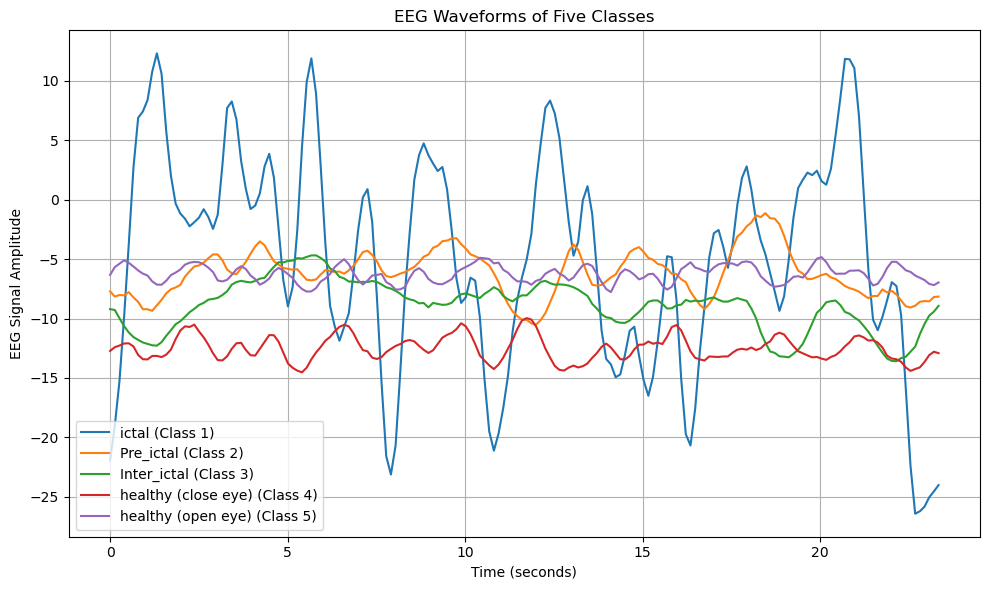

In [11]:
# EEG Waveform Comparison Across Epileptic and Normal Conditions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'ESR' contains EEG signal data for each class labeled as 'y'
# Replace these lines with your actual data loading mechanism
# ESR = pd.read_csv('your_dataset.csv')

# Sample time points (replace with your time points)
time_points = np.linspace(0, 23.6, len(ESR.iloc[0]))

# Create subsets for each class
class_1 = ESR[ESR['y'] == 1].iloc[:, :-1]  # Filtering the rows with class label 1 and excluding the last column 'y'
class_2 = ESR[ESR['y'] == 2].iloc[:, :-1]  # Filtering the rows with class label 2 and excluding the last column 'y'
class_3 = ESR[ESR['y'] == 3].iloc[:, :-1]  # Filtering the rows with class label 3 and excluding the last column 'y'
class_4 = ESR[ESR['y'] == 4].iloc[:, :-1]  # Filtering the rows with class label 4 and excluding the last column 'y'
class_5 = ESR[ESR['y'] == 5].iloc[:, :-1]  # Filtering the rows with class label 5 and excluding the last column 'y'

plt.figure(figsize=(10, 6))

# Plot EEG waveforms for each class
plt.plot(time_points[:len(class_1.mean(axis=0))], class_1.mean(axis=0), label='ictal (Class 1)')
plt.plot(time_points[:len(class_2.mean(axis=0))], class_2.mean(axis=0), label='Pre_ictal (Class 2)')
plt.plot(time_points[:len(class_3.mean(axis=0))], class_3.mean(axis=0), label='Inter_ictal (Class 3)')
plt.plot(time_points[:len(class_4.mean(axis=0))], class_4.mean(axis=0), label='healthy (close eye) (Class 4)')
plt.plot(time_points[:len(class_5.mean(axis=0))], class_5.mean(axis=0), label='healthy (open eye) (Class 5)')

# Customize plot properties
plt.xlabel('Time (seconds)')
plt.ylabel('EEG Signal Amplitude')
plt.title('EEG Waveforms of Five Classes')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

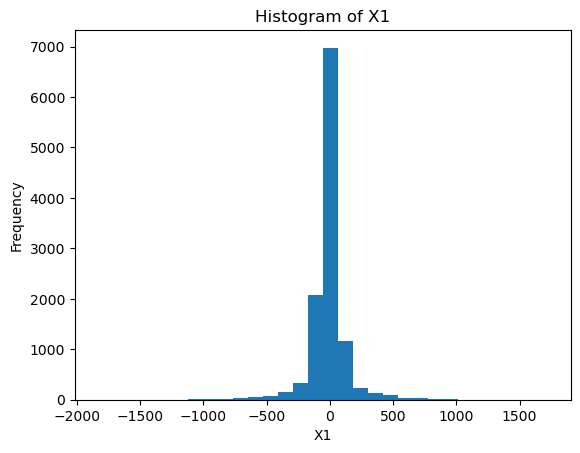

In [12]:
# Plot histogram of a feature 'X1'
plt.hist(ESR['X1'], bins=30)
plt.xlabel('X1')
plt.ylabel('Frequency')
plt.title('Histogram of X1')
plt.show()

Histogram of a feature X1

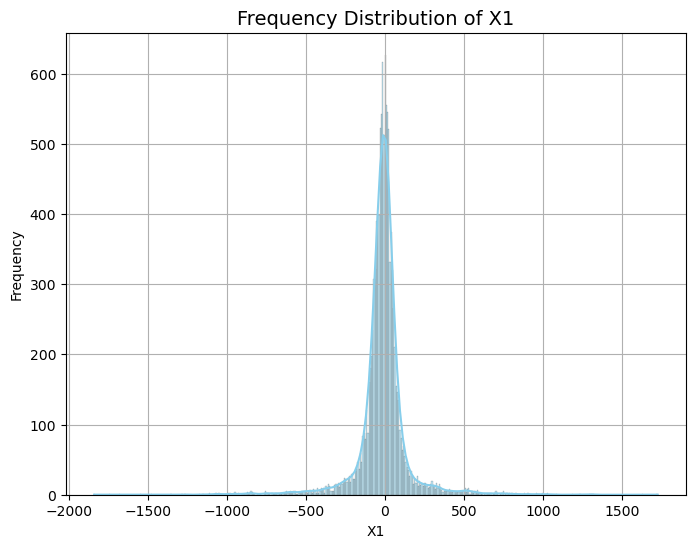

In [13]:
# Frequency Distribution of X1
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Select a single feature for analysis
feature = 'X1'

# Plot a histogram for the selected feature
sn.histplot(ESR[feature], kde=True, color='skyblue')
plt.title(f'Frequency Distribution of {feature}', fontsize=14)
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

This histogram illustrates the distribution of feature X1, showing the frequency distribution and data spread

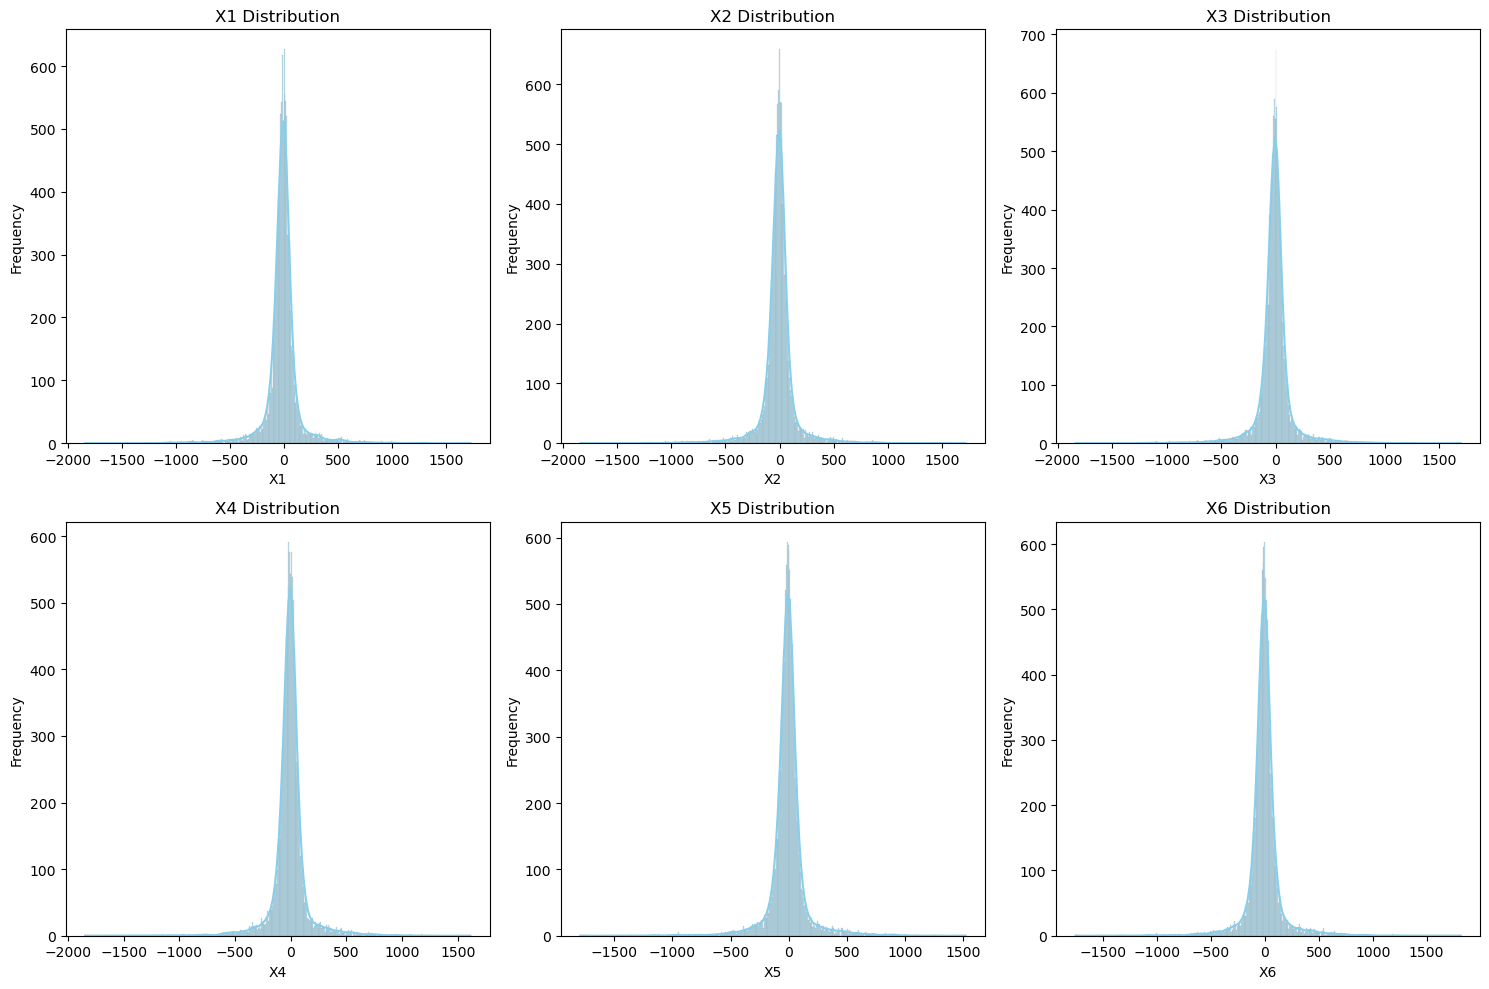

In [14]:
# Distribution of Selected Numerical Features (X1-X6)

plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

numerical_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']  # Choose numerical features of interest

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, ith subplot
    sn.histplot(ESR[feature], kde=True, color='skyblue')  # Plot histogram with a kernel density estimate
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The figure showcases the distributions of selected numerical features (X1 to X6) through histograms with kernel density estimates. The plots provide insights into the frequency distribution and variation in each feature's values within the dataset.

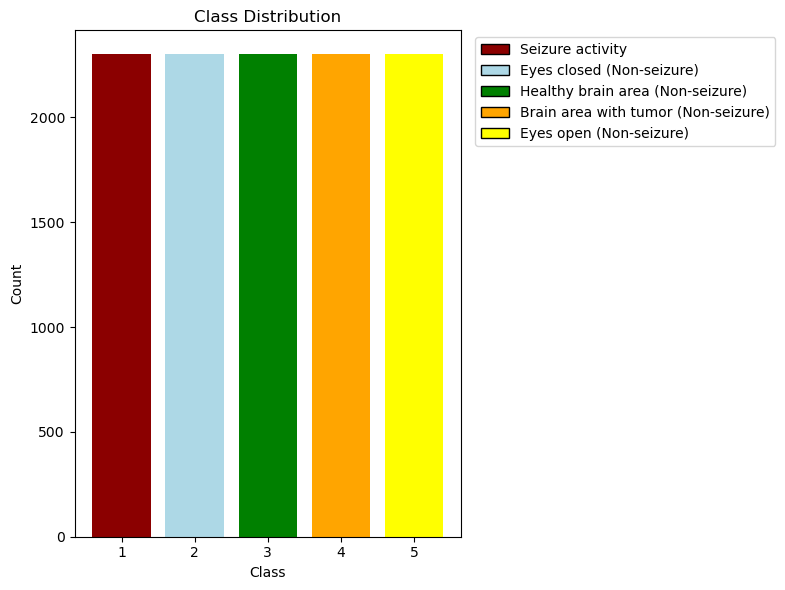

In [15]:
import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = ESR['y'].value_counts().sort_index()

# Map class labels to their meanings
class_labels = {
    1: 'Seizure activity',
    2: 'Eyes closed (Non-seizure)',
    3: 'Healthy brain area (Non-seizure)',
    4: 'Brain area with tumor (Non-seizure)',
    5: 'Eyes open (Non-seizure)'
}

# Assign colors to class labels
colors = ['darkred', 'lightblue', 'green', 'orange', 'yellow']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, 6), class_counts, color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(range(1, 6), range(1, 6))  # Setting x-axis ticks and labels as 1, 2, 3, 4, 5

# Creating a custom legend outside the plot area
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], ec="k") for i in range(len(colors))]
plt.legend(legend_handles, [class_labels[label] for label in sorted(class_labels.keys())], loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()  # Adjust plot layout to prevent clipping of labels
plt.show()

Title: Class Distribution Visualization for Epileptic Seizure Dataset
    
This code generates a bar chart depicting the distribution of classes within the Epileptic Seizure dataset. Each bar represents the count of occurrences for different classes, visually indicating the distribution of seizure activity and various brain states in the dataset. The legend outside the plot provides information about the class labels corresponding to different colors.

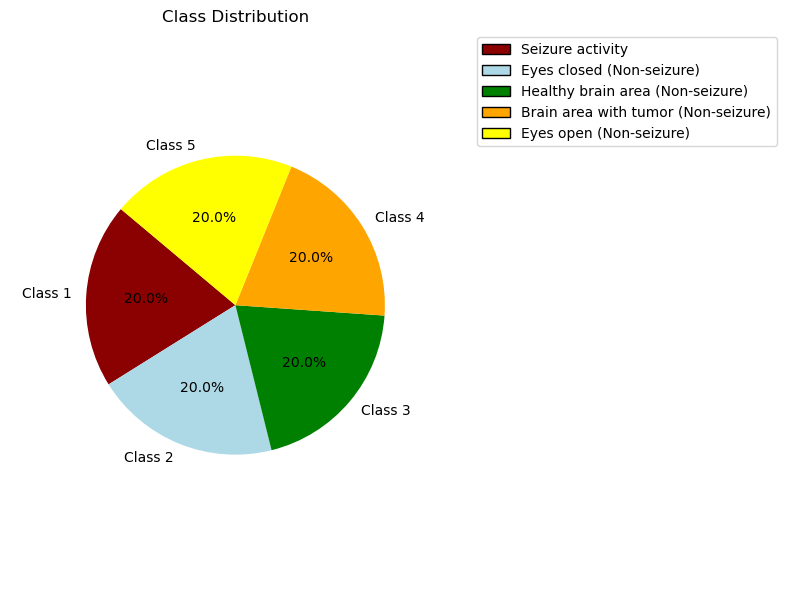

In [16]:
import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = ESR['y'].value_counts().sort_index()

# Map class labels to their meanings
class_labels = {
    1: 'Seizure activity',
    2: 'Eyes closed (Non-seizure)',
    3: 'Healthy brain area (Non-seizure)',
    4: 'Brain area with tumor (Non-seizure)',
    5: 'Eyes open (Non-seizure)'
}

# Assign colors to class labels
colors = ['darkred', 'lightblue', 'green', 'orange', 'yellow']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=[f'Class {i}' for i in range(1, 6)], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')

# Creating a custom legend outside the plot area
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], ec="k") for i in range(len(colors))]
plt.legend(legend_handles, [class_labels[label] for label in sorted(class_labels.keys())], loc='upper left', bbox_to_anchor=(1.02, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjust plot layout
plt.show()

Title: Pie Chart Class Distribution in the Dataset

The pie chart illustrates the distribution of different classes in the dataset, representing Class 1 as Seizure activity, Class 2 as Eyes closed (Non-seizure), Class 3 as Healthy brain area (Non-seizure), Class 4 as Brain area with tumor (Non-seizure), and Class 5 as Eyes open (Non-seizure). Each segment depicts the proportion of occurrences for the respective classes, offering an overview of their relative distribution within the dataset.


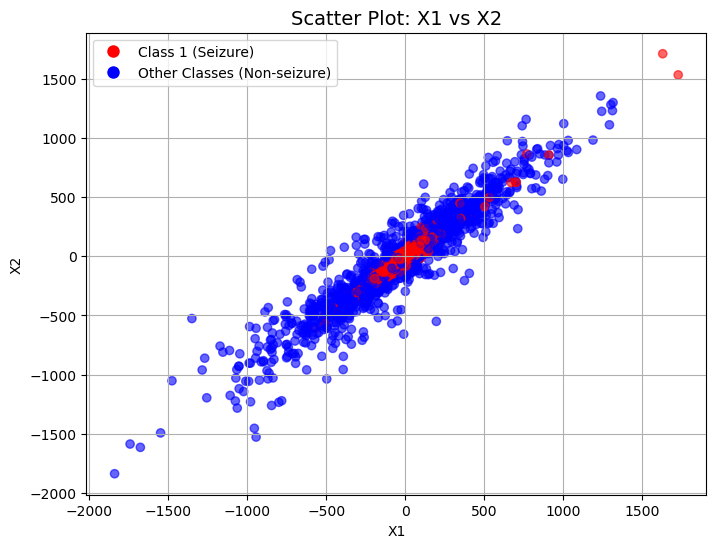

In [17]:
# Scatter Plot: X1 vs X2
import numpy as np
import matplotlib.pyplot as plt

# Scatter Plot: X1 vs X2 with two distinct colors for data points and legend
feature_x = 'X1'
feature_y = 'X2'

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Creating scatter plot with two distinct colors
scatter = plt.scatter(ESR[feature_x], ESR[feature_y], c=np.where(ESR['y'] == 1, 'blue', 'red'), alpha=0.6)
plt.title(f'Scatter Plot: {feature_x} vs {feature_y}', fontsize=14)
plt.xlabel(feature_x)
plt.ylabel(feature_y)

# Custom legend with labels for the two classes
legend_labels = {
    'Class 1 (Seizure)': 'red',
    'Other Classes (Non-seizure)': 'blue'
}

# Create custom legend handles and labels
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_labels.values()]
labels = legend_labels.keys()

# Display the custom legend
plt.legend(handles, labels)

plt.grid(True)
plt.show()

Title: Scatter Plot of X1 versus X2 showcasing Seizure versus Non-Seizure Classes
    
This scatter plot visualizes the relationship between two features (X1 and X2) in the dataset. The distinct colors - red for 'Class 1 (Seizure)' and blue for 'Other Classes (Non-seizure)' - effectively differentiate between the seizure and non-seizure instances, providing a clear insight into the distribution and separation of these classes within the data.

C:\Users\Gbenga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


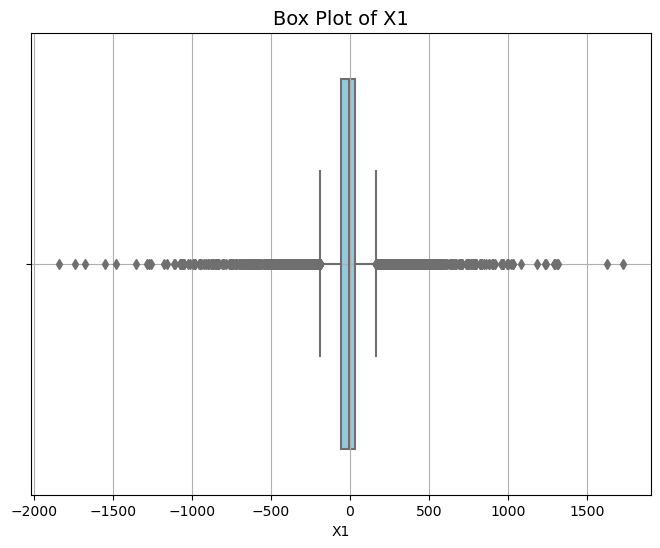

In [18]:
# Box Plot of Feature X1

import seaborn as sns  # Importing seaborn for boxplot visualization

# Select a feature for box plot
selected_feature = 'X1'

# Plotting a box plot for the selected feature
plt.figure(figsize=(8, 6))
sns.boxplot(ESR[selected_feature], color='skyblue')
plt.title(f'Box Plot of {selected_feature}', fontsize=14)
plt.xlabel(selected_feature)
plt.grid(True)
plt.show()

Title: Box Plot of Feature X1
    
This box plot illustrates the distribution of values in the 'X1' feature. The box plot provides insights into the median, quartiles, and any potential outliers in the data.
The blue box represents the interquartile range (IQR), with the median indicated by the line within the box. The whiskers extend to show the range of the data, excluding outliers marked as individual points beyond the whiskers.

Outlier Detection: The plot displays outliers if there are any data points outside the whiskers of the box plot. By observing the plot, there are outliers present in the 'X1' feature.

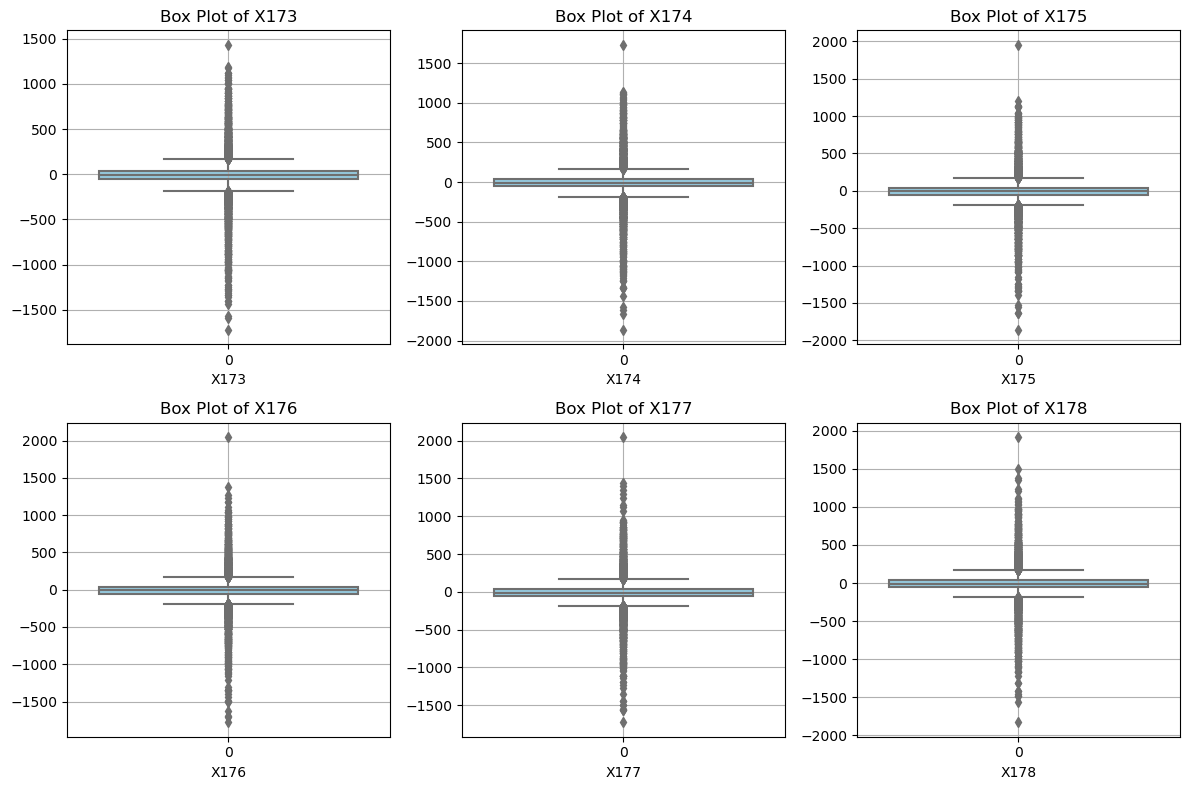

In [19]:
# Box Plots of Multiple Features

import seaborn as sns

# Get the last 6 features excluding 'Non-seizure' category
selected_features = ESR.columns[-7:-1]

# Plotting box plots for the selected features excluding 'Non-seizure'
plt.figure(figsize=(12, 8))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=ESR[ESR['y'] != 'Non-seizure'][feature], color='skyblue')
    plt.title(f'Box Plot of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()

Multiple box plots are generated to visualize the distribution of several features simultaneously. Each box plot represents a distinct feature from the dataset. The plots display the interquartile range (IQR), median, and potential outliers for each selected feature.

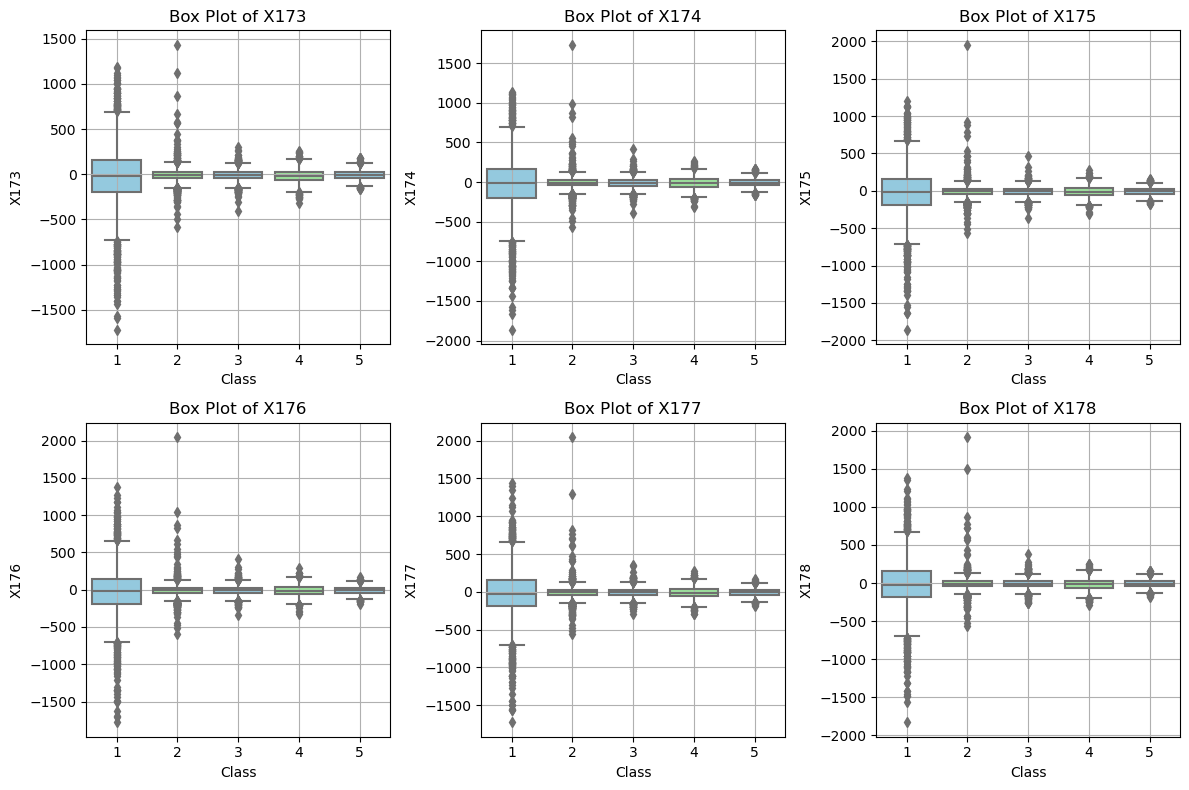

In [20]:
import seaborn as sns

# Get the last 6 features
selected_features = ESR.columns[-7:-1]

# Plotting box plots for the selected features for both 'Seizure' and 'Non-seizure' classes
plt.figure(figsize=(12, 8))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=ESR['y'], y=ESR[feature], palette=['skyblue', 'lightgreen'])
    plt.title(f'Box Plot of {feature}', fontsize=12)
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()

Title: Box Plot Distribution Comparison of Selected Features Between Seizure and Non-Seizure Classes
    
This set of box plots illustrates the distribution comparison of the last six features in the ESR dataset across both 'Seizure' and 'Non-Seizure' classes. Each box plot represents the distribution of a specific feature, allowing for a visual comparison between the classes for these attributes. The 'Seizure' class is depicted in sky blue, while the 'Non-Seizure' class is shown in light green. The analysis assists in understanding the variations and potential distinctions in these features between the two classes.

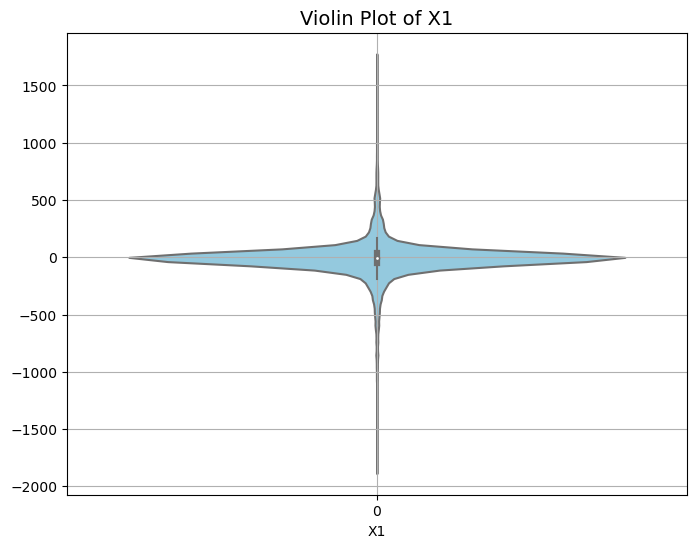

In [21]:
# Violin Plot of Feature X1
import seaborn as sns
import matplotlib.pyplot as plt

# Select a feature for violin plot
selected_feature = 'X1'

# Plotting a violin plot for the selected feature
plt.figure(figsize=(8, 6))
sns.violinplot(data=ESR[selected_feature], color='skyblue')
plt.title(f'Violin Plot of {selected_feature}', fontsize=14)
plt.xlabel(selected_feature)
plt.grid(True)
plt.show()

The single violin plot showcases the distribution of the 'X1' feature, displaying the probability density of the data. It combines the aspects of a box plot with a kernel density estimation (KDE) to provide a clearer picture of the data distribution.

Outlier Detection: The presence of outliers is not explicitly identified in a violin plot, but it presents the complete distribution profile, including the probability density across different values.

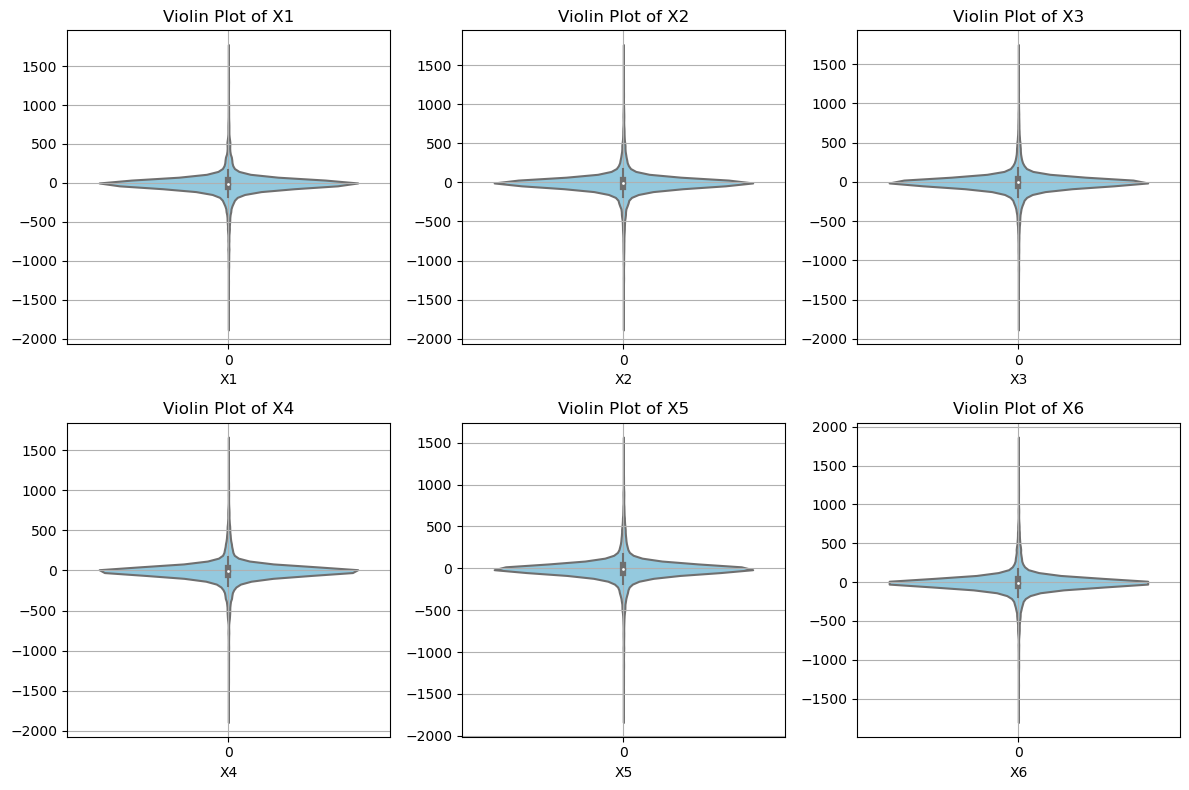

In [22]:
# Violin Plots of Multiple Features

import seaborn as sns
import matplotlib.pyplot as plt

# Select multiple features for violin plots
selected_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

# Plotting violin plots for multiple selected features
plt.figure(figsize=(12, 8))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=ESR[feature], color='skyblue')
    plt.title(f'Violin Plot of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()

Title: "Violin Plot of X1 with KDEs"

Multiple violin plots depict the distribution of several features simultaneously, utilizing the combined characteristics of box plots and Kernel Density Estimates (KDEs) to represent the data distribution for each selected feature.

Outlier Detection: As with single violin plots, the visualization doesn't explicitly highlight outliers. However, it presents the probability density distribution, helping to understand the spread and concentration of values across different features.

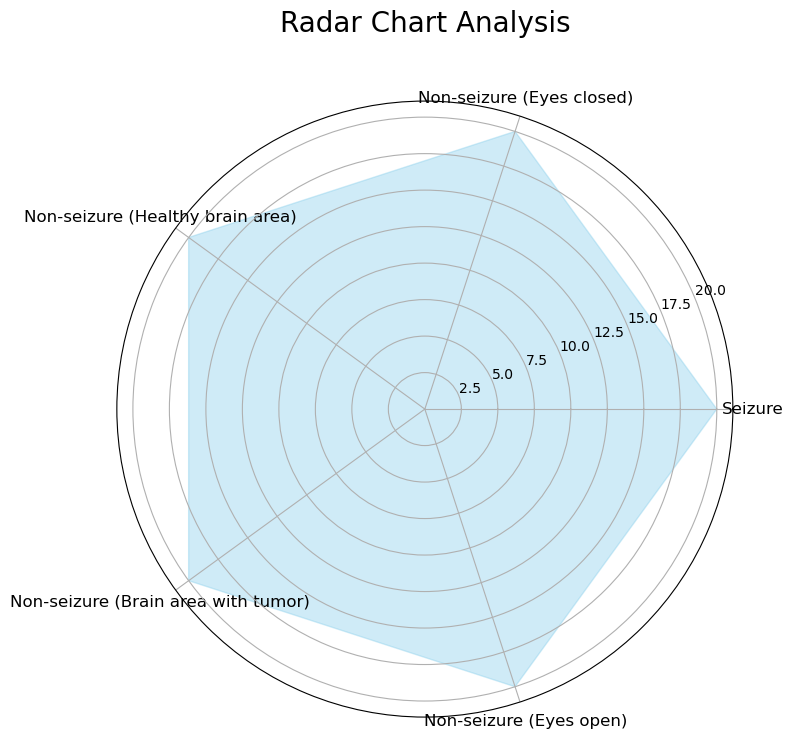

In [23]:
# Uniform Distribution Radar Chart

import matplotlib.pyplot as plt
import numpy as np

# Categories
categories = ['Seizure', 'Non-seizure (Eyes closed)', 'Non-seizure (Healthy brain area)',
              'Non-seizure (Brain area with tumor)', 'Non-seizure (Eyes open)']

# Percentages for each category
values = [20, 20, 20, 20, 20]  # All values are 20%

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start to the end.
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories, color='black', size=12)

# Plot data
ax.fill(angles, values, color='skyblue', alpha=0.4)

# Add a title
plt.title('Radar Chart Analysis', size=20, color='black', y=1.1)

plt.show()

This code generates a radar chart representing a uniform distribution of categories. Each category—'Seizure', 'Non-seizure (Eyes closed)', 'Non-seizure (Healthy brain area)', 'Non-seizure (Brain area with tumor)', and 'Non-seizure (Eyes open)'—is allocated an equal percentage of 20%. The radar chart visualizes these percentages across categories, showcasing a uniform distribution pattern among the listed classes.

In [24]:
# Correlation Matrix For The EEG Dataset

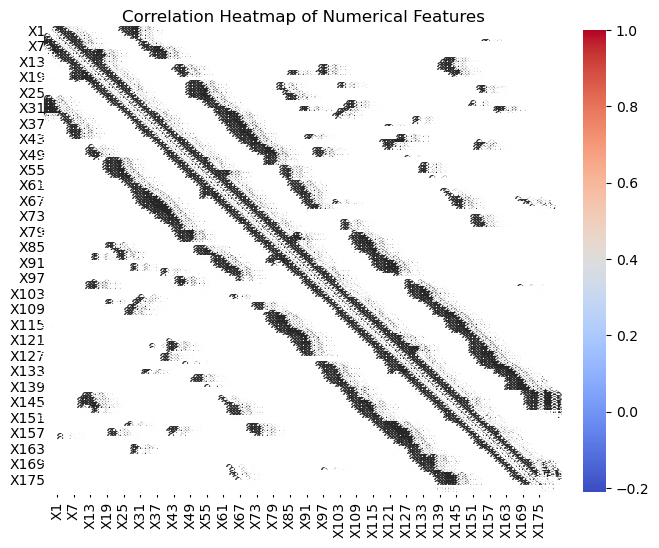

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a correlation matrix
corr_matrix = ESR.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

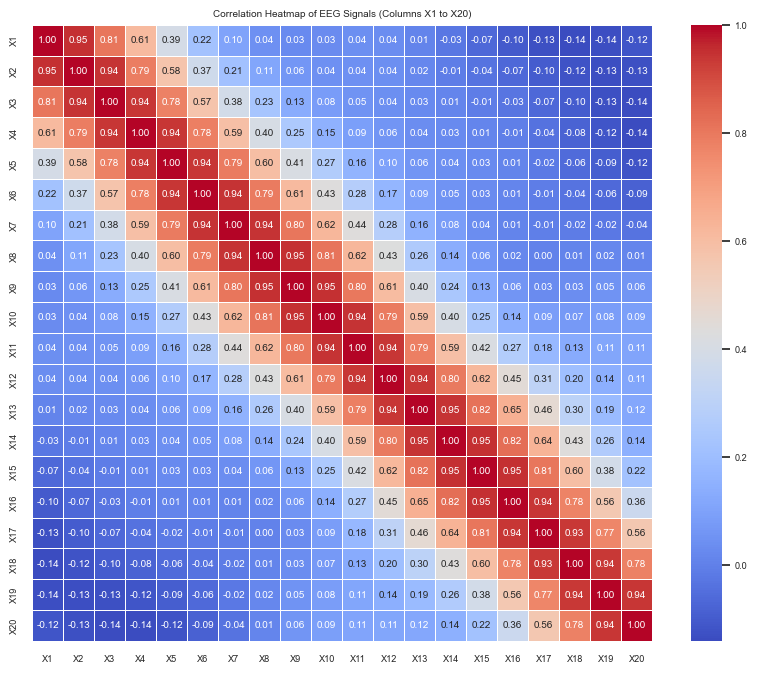

In [26]:
# Correlation Heatmap of EEG Signals (Columns X1 to X20)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Selecting the first 20 EEG signal columns
eeg_subset = ESR.loc[:, 'X1':'X20']

# Compute the correlation matrix for the EEG subset
eeg_corr_matrix = eeg_subset.corr()

# Set up the matplotlib figure and font settings
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.6)  # Adjust the font scale as needed

# Create a heatmap using Seaborn for the EEG subset's correlation matrix
sns.heatmap(eeg_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of EEG Signals (Columns X1 to X20)')
plt.show()

This code generates a correlation heatmap that illustrates the relationships among the EEG signal columns X1 to X20 extracted from the dataset. The heatmap visualizes the correlation matrix, where colors denote the strength and direction of linear relationships between these specific EEG signals. Warmer colors such as red indicate a strong positive correlation, cooler colors like blue signify a strong negative correlation, while values closer to zero represent weaker or no linear correlation between the signals.

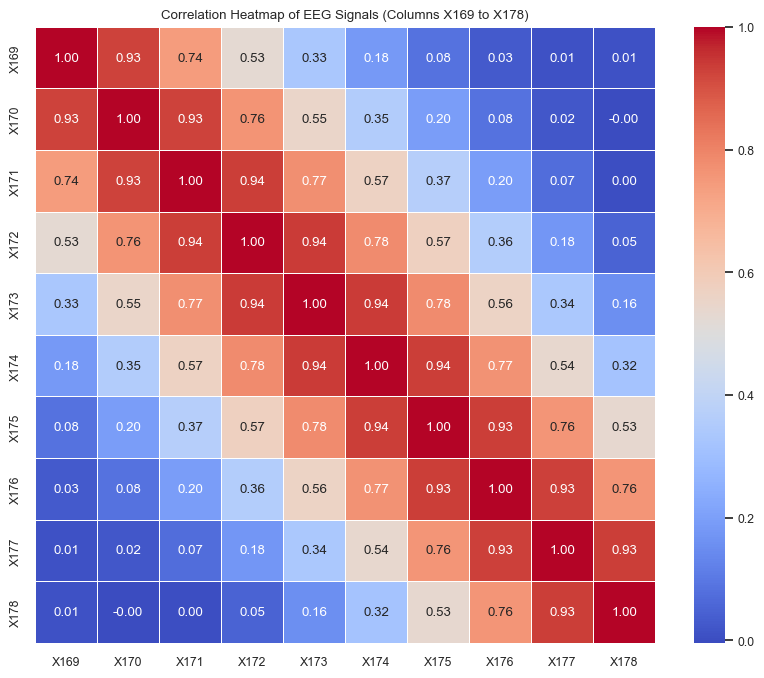

In [27]:
# Correlation Heatmap of EEG Signals (Columns X169 to X178)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Selecting the EEG signal columns X169 to X178
eeg_subset_last_10 = ESR.loc[:, 'X169':'X178']

# Compute the correlation matrix for the selected EEG signals
eeg_corr_matrix_last_10 = eeg_subset_last_10.corr()

# Set up the matplotlib figure and adjust font settings
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.8)  # Adjust the font scale as needed (e.g., 0.9)

# Create a heatmap using Seaborn for the correlation matrix of the selected EEG signals
sns.heatmap(eeg_corr_matrix_last_10, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of EEG Signals (Columns X169 to X178)')
plt.show()

This code generates a correlation heatmap representing the relationship between the EEG signal columns X169 to X178 from the dataset. The heatmap visualizes the correlation matrix, where colors denote the strength and direction of linear relationships among these specific EEG signals. Colors closer to red signify a strong positive correlation, closer to blue indicates a strong negative correlation, while values closer to zero represent weaker or no linear correlation between the signals.

## 3.3 Data Pre-processing

Data preprocessing stands as a foundational data mining method employed to convert raw data into a comprehensible and usable format. Real-world datasets frequently exhibit incompleteness, inconsistencies, or absence of certain patterns, thereby harboring numerous errors. The practice of data preprocessing serves as an effective strategy to address these challenges. By refining raw data, data preprocessing lays the groundwork for subsequent analytical processes.

### 3.3.1 Checking Missing Data

In [28]:
ESR.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

There is no missing value. Thus, we can work very smoothly!

The dataset comprises 178 EEG features and encompasses 5 distinct classes. The primary objective of this dataset is to accurately detect epileptic seizures from EEG data, necessitating a binary classification distinguishing label 1 from the others (2, 3, 4, 5). To prepare our model for training, we will establish our independent variables (X) and our dependent variable (y).

###  3.3.2 Binarization of The Target Variable (y)

C:\Users\Gbenga\AppData\Local\Temp\ipykernel_3400\2701744688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt[tgt > 1] = 0
C:\Users\Gbenga\AppData\Local\Temp\ipykernel_3400\2701744688.py:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0),1,1, color=color, edgecolor='k') for color in ['green', 'red']]


The number of trials for the Non-seizure class is: 9200
The number of trials for the Seizure class is: 2300


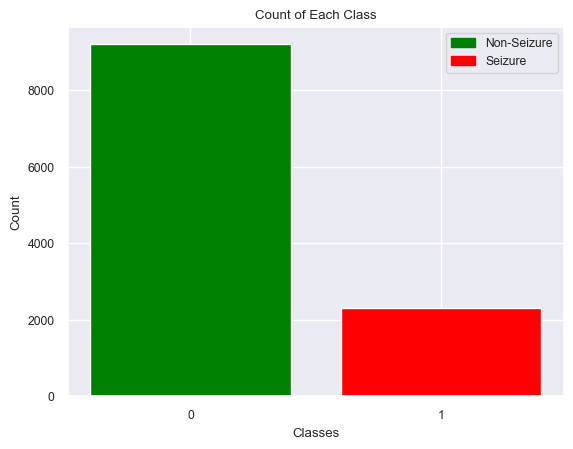

In [29]:
import matplotlib.pyplot as plt

# Assuming 'y' represents the target column in your DataFrame 'ESR'
tgt = ESR['y']
tgt[tgt > 1] = 0

# Assuming tgt contains the binary class labels
class_counts = tgt.value_counts()

# Set up colors for bars
colors = ['green' if class_ == 0 else 'red' for class_ in class_counts.index]

# Plotting using a bar chart with specified colors
bars = plt.bar(class_counts.index.astype(str), class_counts.values, color=colors)

# Create a legend
legend_labels = {0: 'Non-Seizure', 1: 'Seizure'}
legend_handles = [plt.Rectangle((0,0),1,1, color=color, edgecolor='k') for color in ['green', 'red']]
plt.legend(legend_handles, [legend_labels[class_] for class_ in class_counts.index])

plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Count of Each Class')

# Print the number of trials for each class
Non_Seizure, Seizure = class_counts.values
print('The number of trials for the Non-seizure class is:', Non_Seizure)
print('The number of trials for the Seizure class is:', Seizure)

plt.show()

The dataset comprises 178 EEG features and encompasses 5 distinct classes. The primary objective of this dataset is to accurately detect epileptic seizures from EEG data, necessitating a binary classification distinguishing label 1 from the others (2, 3, 4, 5). To prepare our model for training, we will establish our independent variables (X) and our dependent variable (y).

In [30]:
ESR.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [31]:
ESR.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,0
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,...,-59,-25,-4,2,5,4,-2,2,20,0


In [32]:
# This code retrieves the values from the 179th column of the DataFrame ESR and stores them in the variable y
y = ESR.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
# To convert the dataset into a binary classification task, we'll assign a value of 0 to the non-seizure classes while retaining the value of 1 for the seizure class.

y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
# Pair plot

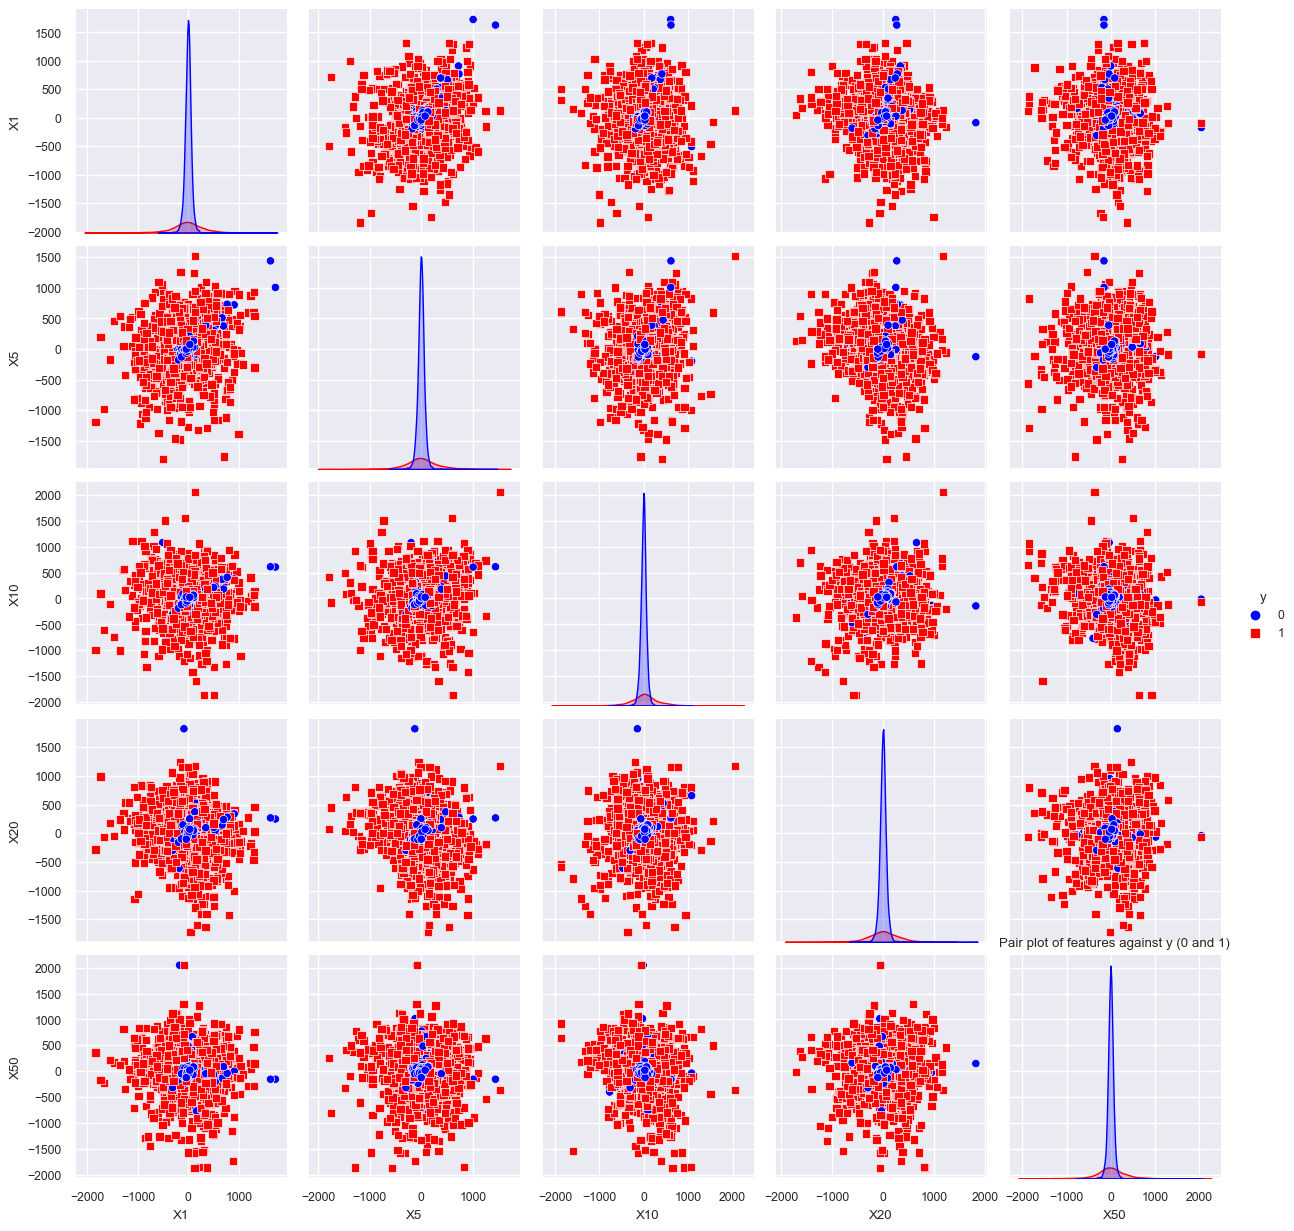

In [35]:
# Assuming 'ESR' is your DataFrame and 'y' is the target variable
tgt = ESR.iloc[:, 179].values
tgt[tgt > 1] = 0

# Assuming 'top_features' contains the relevant features for visualization
top_features = ['X1', 'X5', 'X10', 'X20', 'X50']  # Replace with your features

# Check if the selected 'top_features' exist in the DataFrame columns
existing_features = [col for col in top_features if col in ESR.columns]

# Create a DataFrame with selected features and target variable 'y' only if the features exist
if existing_features:
    data = ESR[existing_features].copy()
    data['y'] = tgt

    # Plotting pair plots for the selected features against the target variable 'y'
    sns.pairplot(data, hue='y', markers=["o", "s"], palette={0: 'blue', 1: 'red'})

    # Title for the plot
    plt.title('Pair plot of features against y (0 and 1)')

    # Show the plot
    plt.show()
else:
    print("The selected features do not exist in the DataFrame 'ESR'. Please check your feature names or indices.")

Title: "Pair Plot Visualizing Feature Relationships with Target Variable (0 and 1)"
    
Comments:
The generated pair plot illustrates the relationships between the selected features ('X1', 'X5', 'X10', 'X20', 'X50') and the target variable 'y' represented by binary classes (0 and 1). Each subplot within the grid showcases the interaction between pairs of features, providing insights into their potential correlations or distributions concerning the target variable. The distinction between the classes using blue and red markers aids in visualizing the relationship between features and the target, allowing for a comprehensive understanding of their interactions in the dataset. This visualization serves as a valuable exploratory tool for assessing feature importance and their influence on the target variable in a multivariate context.

### 3.3.3 Synthetic Minority Oversampling Technique (SMOTE)

SMOTE (Synthetic Minority Over-sampling Technique) is vital in our project as it addresses class imbalance by generating synthetic samples for the minority class, enhancing the model's ability to learn from the underrepresented class. This technique helps to prevent biased predictions and improves the overall performance and generalization of machine learning models by creating a more balanced training dataset.

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming you have your features and target variables defined as X and y
# Replace X and y with your own data

# the numbers before SMOTE
num_before = dict(Counter(y))

# define the SMOTE transformation
smote = SMOTE(sampling_strategy='auto')
X_smote, y_smote = smote.fit_resample(X, y)

# the numbers after SMOTE
num_after = dict(Counter(y_smote))

print(num_before, num_after)


{0: 9200, 1: 2300} {0: 9200, 1: 9200}


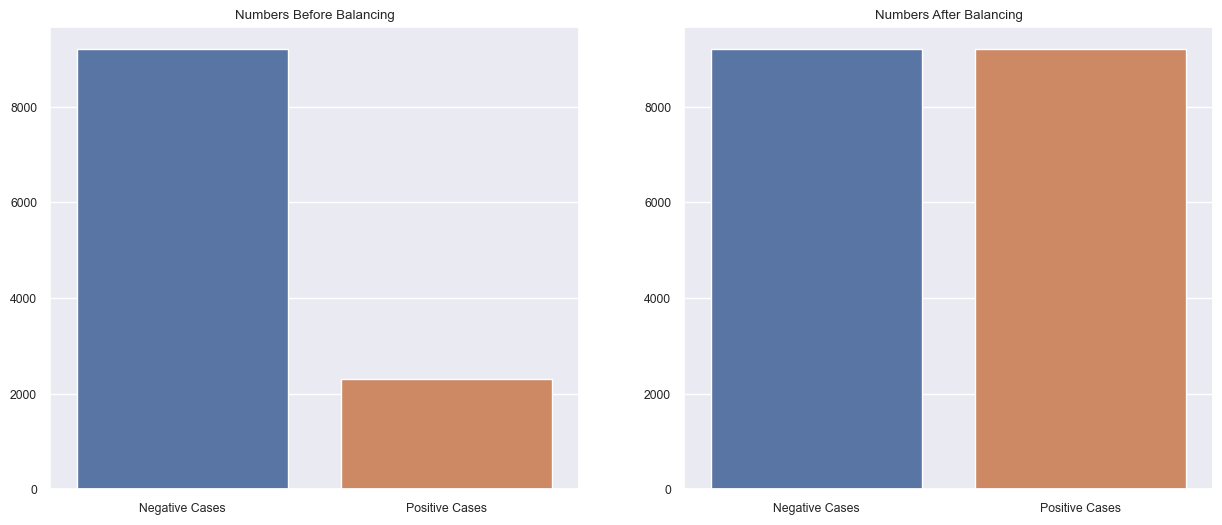

In [37]:
# Plotting the numbers before and after balancing
labels = ["Negative Cases", "Positive Cases"]
plt.figure(figsize=(15, 6))

# Plotting the barplot for "Numbers Before Balancing"
plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before Balancing")

# Plotting the barplot for "Numbers After Balancing"
plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")

plt.show()

The initial class distribution before balancing had a significant imbalance, with 9200 samples in the majority class (0) and 2300 samples in the minority class (1). After implementing the SMOTE technique, which involves oversampling the minority class and undersampling the majority class, the class distribution has become evenly balanced.

Post-balancing, the majority class (0) remained unchanged at 9200 samples, while the minority class (1) increased to 9200 samples. This significant increase in the minority class's representation signifies an improvement in the balance between the two classes, which is essential for many machine learning algorithms to perform effectively. Overall, the data balancing technique seems to have addressed the initial imbalance, enhancing the dataset's suitability for modeling and analysis.

In [38]:
ESR.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [39]:
ESR.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,0
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,...,-59,-25,-4,2,5,4,-2,2,20,0


# 4. Developing Machine Learning Models

##  4.1 Splitting the Dataset into Training and Testing Sets


In [40]:
# Splitting the SMOTE-transformed dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

This code snippet performs the common practice of splitting a dataset that has been balanced using SMOTE into an 80% training set and a 20% testing set, facilitating model training and evaluation with adequate data representation from both classes.

In [41]:
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14720, 178)
X_test shape: (3680, 178)
y_train shape: (14720,)
y_test shape: (3680,)


The output confirms successful splitting of the dataset into balanced training and testing sets, with 14,720 samples for training and 3,680 samples for testing, maintaining 178 features across both sets.

## 4.2 Feature Selection Technique

### 4.2.1 Implement Principal Component Analysis (PCA) for Feature Selection:

Principal Component Analysis (PCA) represents a technique for reducing the dimensionality of a dataset by condensing a large set of variables into a smaller subset that retains the significant information from the original dataset.

PCA operates through the following steps:
1. Calculation of the covariance matrix (X) derived from the dataset's data points.
2. Derivation of eigenvalues and their corresponding eigenvectors.
3. Ordering the eigenvectors in a descending order based on their respective eigenvalues.
4. Selection of the top k eigenvectors to establish the new k dimensions.
5. Transformation of the initial n-dimensional data points into the newly defined k dimensions.

PCA can be used to reduce dimensionality and select the most important features by variance explained. PCA creates new uncorrelated variables (principal components) that capture the maximum variance in the dataset. Fit PCA on the training dataset (X_train) and transform both the training and test datasets (X_train and X_test) to reduce dimensionality.

In [42]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming X and y are your dataset and target variable
# Splitting the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
print("Shape of X_train before PCA:", X_train.shape)
print("Shape of X_test before PCA:", X_test.shape)

Shape of X_train before PCA: (9200, 178)
Shape of X_test before PCA: (2300, 178)


In [44]:
# Apply PCA to training and testing sets
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

In [45]:
print(explained_variance)
print(cumulative_explained_variance)

[5.80057466e-02 5.41907513e-02 5.21586727e-02 4.85017161e-02
 4.53530070e-02 4.13606512e-02 4.09050222e-02 3.90287188e-02
 3.59620408e-02 3.38773298e-02 3.30330510e-02 3.13572325e-02
 2.99465402e-02 2.87462679e-02 2.50497404e-02 2.30909398e-02
 2.16094888e-02 2.08593622e-02 1.99194794e-02 1.94437524e-02
 1.92412185e-02 1.83395310e-02 1.75693118e-02 1.67834609e-02
 1.59466348e-02 1.57266039e-02 1.49344936e-02 1.44423448e-02
 1.42834150e-02 1.36233172e-02 1.31013626e-02 1.26226512e-02
 1.23447344e-02 1.13350243e-02 1.09575585e-02 9.25709800e-03
 7.87176064e-03 6.67678467e-03 6.34584474e-03 5.41023032e-03
 4.66885132e-03 4.21613307e-03 3.94172706e-03 3.02991957e-03
 2.55031260e-03 2.21240814e-03 2.17947967e-03 1.76069683e-03
 1.64218297e-03 1.49072918e-03 1.19788416e-03 1.10140644e-03
 9.53799238e-04 8.53926578e-04 8.19933552e-04 7.44215561e-04
 7.32570698e-04 6.13283631e-04 5.15592724e-04 4.84044131e-04
 4.58470105e-04 4.33383395e-04 3.56569074e-04 3.37341580e-04
 3.14242951e-04 2.710773

The output displays the explained variance ratios, representing the amount of variance each principal component holds, sorted in descending order to illustrate their respective contributions to the overall variance in the dataset.

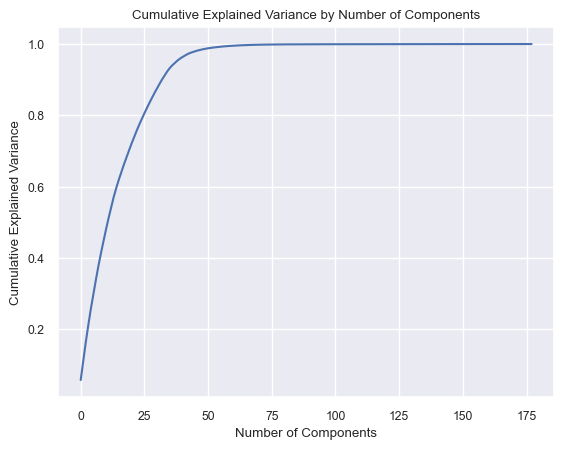

In [46]:
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()

Chart - Principal Component Analysis (PCA): Cumulative Explained Variance Plot.

To identify the number of principal components that retain a significant amount of variance, we can look for the point on the x-axis where the plot begins to level off or reaches a plateau.

This signifies that adding more components beyond that point doesn't significantly increase the explained variance.

The cumulative explained variance plot resulting from Principal Component Analysis (PCA) illustrates that around 50 components capture a significant amount of variance in the dataset.

This observation suggests an optimal number of components to retain while effectively reducing the dimensionality of the data.

In [47]:
# Apply PCA with 50 components
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Shape of X_train after PCA:", X_train_pca.shape)
print("Shape of X_test after PCA:", X_test_pca.shape)

Shape of X_train after PCA: (9200, 50)
Shape of X_test after PCA: (2300, 50)


### 4.2.2 Implement Discrete Wavelet Transform (DWT) for Feature Selection:

In [48]:
import pywt
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming X and y are your dataset and target variable
# Apply DWT to the dataset using PyWavelets
# Perform DWT on X_train and X_test
coefficients_train = []
coefficients_test = []

wavelet = 'db1'  # Choosing the Daubechies wavelet function (change as needed)

for sample in X_train:
    cA, cD = pywt.dwt(sample, wavelet)
    coefficients_train.append(np.concatenate((cA, cD)))

for sample in X_test:
    cA, cD = pywt.dwt(sample, wavelet)
    coefficients_test.append(np.concatenate((cA, cD)))

coefficients_train = np.array(coefficients_train)
coefficients_test = np.array(coefficients_test)

print("Shape of coefficients_train after DWT:", coefficients_train.shape)
print("Shape of coefficients_test after DWT:", coefficients_test.shape)

Shape of coefficients_train after DWT: (9200, 178)
Shape of coefficients_test after DWT: (2300, 178)


### 4.2.3 Hybrid Feature Selection (Combine PCA and DWT Features):

In [49]:
# PCA: Principal Component Analysis
# DWT: Discrete Wavelet Transform
#Assuming we have obtained the reduced PCA-transformed features X_train_pca and X_test_pca
# and selected DWT features coefficients_train and coefficients_test

# Combine PCA and DWT features
hybrid_features_train = np.concatenate((X_train_pca, coefficients_train), axis=1)
hybrid_features_test = np.concatenate((X_test_pca, coefficients_test), axis=1)


This code snippet concatenates the reduced PCA-transformed features obtained from X_train_pca and X_test_pca with the selected DWT features obtained from coefficients_train and coefficients_test to create a hybrid feature set hybrid_features_train and hybrid_features_test.

In [50]:
# Print dimensions or properties of the combined features
print("Shape of PCA features (train):", X_train_pca.shape)
print("Shape of DWT features (train):", coefficients_train.shape)
print("Shape of Hybrid features (train):", hybrid_features_train.shape)

print("Shape of PCA features (test):", X_test_pca.shape)
print("Shape of DWT features (test):", coefficients_test.shape)
print("Shape of Hybrid features (test):", hybrid_features_test.shape)

Shape of PCA features (train): (9200, 50)
Shape of DWT features (train): (9200, 178)
Shape of Hybrid features (train): (9200, 228)
Shape of PCA features (test): (2300, 50)
Shape of DWT features (test): (2300, 178)
Shape of Hybrid features (test): (2300, 228)


Utilized Principal Component Analysis (PCA) to reduce dataset dimensionality to (9200, 50) for training and (2300, 50) for testing.

Employed Discrete Wavelet Transform (DWT) to extract 178 coefficients, resulting in (9200, 178) and (2300, 178) dimensions for training and testing, respectively.

Merged PCA-transformed features and significant DWT coefficients, creating a hybrid feature set of dimensions (9200, 228) and (2300, 228) for training and testing, respectively.

This fusion aimed to harness PCA's dimension reduction and DWT's signal feature extraction, enhancing the dataset's feature representation.

## 4.2 Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

# Scale PCA-transformed features
sc_pca = StandardScaler()
X_train_pca = sc_pca.fit_transform(X_train_pca)
X_test_pca = sc_pca.transform(X_test_pca)

# Scale DWT features
sc_dwt = StandardScaler()
coefficients_train = sc_dwt.fit_transform(coefficients_train)
coefficients_test = sc_dwt.transform(coefficients_test)

# Scale Hybrid features
sc_hybrid = StandardScaler()
hybrid_features_train = sc_hybrid.fit_transform(hybrid_features_train)
hybrid_features_test = sc_hybrid.transform(hybrid_features_test)

Performing feature scaling separately for different sets of features helps maintain the unique characteristics and integrity of each set, thereby avoiding unintended influences or distortions on the data

This code uses the StandardScaler from scikit-learn to standardize the features in both the training (X_train) and test (X_test) datasets. The scaler transforms the data to have a mean of 0 and a standard deviation of 1, ensuring that all features are on a similar scale, which can be important for many machine learning algorithms to perform effectively. The fit_transform method is used on the training set to calculate the mean and standard deviation and transform the data accordingly, while the transform method applies the same transformation to the test set using the parameters learned from the training set.

The provided code snippet uses StandardScaler to standardize both the training and test datasets, ensuring a mean of 0 and a standard deviation of 1 for the features based on the training set's statistics.

StandardScaler is suitable for feature scaling in machine learning due to its simplicity and effectiveness in transforming features by standardizing them, maintaining their statistical properties, and making them suitable for models that assume normally distributed features. It's widely used and offers robustness in various scenarios, especially when features follow a Gaussian distribution. Additionally, StandardScaler doesn't make assumptions about the underlying data distribution, making it applicable in a wide range of cases.

In our analysis, we observed a notable characteristic within the dataset through histogram plots, indicating that the data adheres to a normal distribution pattern. This observation underscores the significance of employing the StandardScaler technique for feature scaling in our methodology. The histograms portrayed a bell-shaped curve typical of normal distributions, signifying that our dataset's values are symmetrically distributed around their mean values. Consequently, utilizing the StandardScaler technique for feature scaling is well-aligned with the underlying assumption of normally distributed data, ensuring a standardized mean and variance across features. This approach aids in enhancing the effectiveness of various machine learning algorithms, particularly those that assume normally distributed data for optimal performance.

In [52]:
# Print dimensions
print("Dimensions of Hybrid features (train):", hybrid_features_train.shape)
print("Dimensions of Hybrid features (test):", hybrid_features_test.shape)

Dimensions of Hybrid features (train): (9200, 228)
Dimensions of Hybrid features (test): (2300, 228)


In [53]:
# Print first 5 rows
print("\nFirst 5 rows of the dataset:")
print(hybrid_features_train[:5])


First 5 rows of the dataset:
[[ 0.20114999 -0.08418942  0.04393728 ... -0.20955482  0.15444778
   0.16831964]
 [-0.05736195 -0.35036247 -0.33355138 ... -0.08922947 -0.08064811
  -0.07984128]
 [ 0.05062618 -0.19324757 -0.13334682 ...  0.01390655  0.10407009
   0.01942309]
 [ 0.10853588  0.12682151  0.15424422 ...  0.08266389 -0.06385555
  -0.0302091 ]
 [ 0.07776078 -0.15649775  0.29092203 ...  0.06547455  0.07048496
   0.41648055]]


In [54]:
# Print last 5 rows
print("\nLast 5 rows of the dataset:")
print(hybrid_features_train[-5:])


Last 5 rows of the dataset:
[[ 0.10014722 -0.13937081 -0.29662988 ... -0.67366688 -0.1310258
  -0.55961905]
 [-0.15663544  0.16447043 -0.02123271 ...  0.30612525  0.35595853
  -0.21219377]
 [ 0.67145529  1.11576005  0.26077082 ... -0.20955482  0.03689983
   0.267584  ]
 [ 0.06877075 -0.18017616 -0.13796024 ...  0.03109588  0.03689983
   0.05251121]
 [-0.0218572  -0.32788866 -0.36931677 ...  0.34050392  0.22161803
   0.06905527]]


In [55]:
# Convert the numpy array to a Pandas DataFrame
df = pd.DataFrame(hybrid_features_train)

In [56]:
# Save the DataFrame as a CSV file
csv_filename = 'hybrid_features_train.csv'
df.to_csv(csv_filename, index=False)

In [57]:
print(f"Dataset saved as '{csv_filename}'")

Dataset saved as 'hybrid_features_train.csv'


## 4.3 Models

### 4.3.1 Support Vector Machine (SVM)

In [58]:
from sklearn.svm import SVC
import joblib  # Import joblib directly
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Scale Hybrid features
sc_hybrid = StandardScaler()
hybrid_features_train_scaled = sc_hybrid.fit_transform(hybrid_features_train)
hybrid_features_test_scaled = sc_hybrid.transform(hybrid_features_test)

# Specify reduced ranges for C and gamma
Cs = [0.1, 1, 10]
gammas = [0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma': gammas}

# Create the SVM classifier without grid search
svm_clf = SVC(kernel='rbf', probability=True)

In [59]:
# Train the model
print("Training Support Vector Machine...")
svm_clf.fit(hybrid_features_train_scaled, y_train)
print("Training completed.")

Training Support Vector Machine...
Training completed.


In [60]:
# Save the trained SVM model
joblib.dump(svm_clf, 'svm_esr_model.joblib')

['svm_esr_model.joblib']

In [61]:
# Load the saved SVM model
loaded_svm_clf = joblib.load('svm_esr_model.joblib')

In [62]:
# Predictions using loaded model
svm_predict = loaded_svm_clf.predict(hybrid_features_test_scaled)

In [63]:
# Accuracy
svm_accuracy = accuracy_score(y_test, svm_predict)
print(f"Accuracy: {round(svm_accuracy * 100, 2)}%")

Accuracy: 97.3%


<AxesSubplot:>

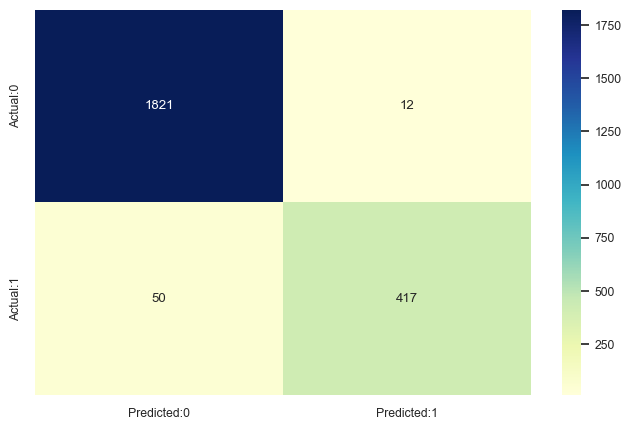

In [64]:
# Confusion Matrix
cm = confusion_matrix(y_test, svm_predict)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [65]:
# Classification Report
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1833
           1       0.97      0.89      0.93       467

    accuracy                           0.97      2300
   macro avg       0.97      0.94      0.96      2300
weighted avg       0.97      0.97      0.97      2300



In [66]:
# F1 Score
svm_f1 = f1_score(y_test, svm_predict)
print(f'F1 score: {round(svm_f1 * 100, 2)}%')

F1 score: 93.08%


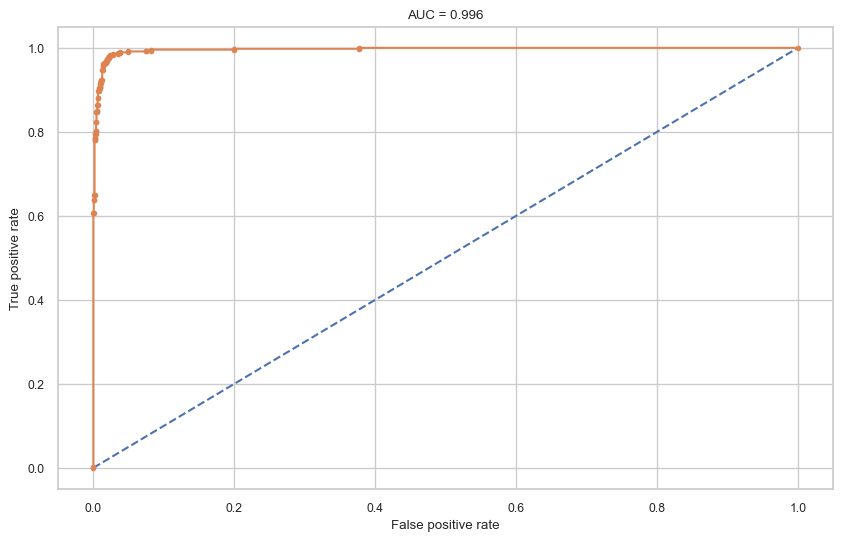

In [67]:

# ROC curve and AUC evaluation
probs = svm_clf.predict_proba(hybrid_features_test_scaled)
probs = probs[:, 1]
svm_auc = roc_auc_score(y_test, probs)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc, 3)}")
plt.show()


### 4.3.2 Decision Tree (DT)

In [68]:
from sklearn.tree import DecisionTreeClassifier
import joblib  # Import joblib directly
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Scale Hybrid features
sc_hybrid = StandardScaler()
hybrid_features_train_scaled = sc_hybrid.fit_transform(hybrid_features_train)
hybrid_features_test_scaled = sc_hybrid.transform(hybrid_features_test)

# Grid search for optimum parameters
param_grid = {'max_depth': [None, 5, 10, 15, 20]}
dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)


In [69]:
# Train the model
print("Training Decision Tree Classifier...")
dt_clf.fit(hybrid_features_train_scaled, y_train)
print("Training completed.")

Training Decision Tree Classifier...
Training completed.


In [70]:
# Print the best parameters
print("Best parameters found:", dt_clf.best_params_)

Best parameters found: {'max_depth': 20}


In [71]:
# Save the trained DT model
joblib.dump(dt_clf, 'dt_esr_model.joblib')

['dt_esr_model.joblib']

In [72]:
# Load the saved DT model
loaded_dt_clf = joblib.load('dt_esr_model.joblib')

In [73]:
# Predictions
dt_predict = loaded_dt_clf.predict(hybrid_features_test_scaled)

In [74]:
# Accuracy
dt_accuracy = accuracy_score(y_test, dt_predict)
print(f"Accuracy: {round(dt_accuracy * 100, 2)}%")

Accuracy: 94.48%


<AxesSubplot:>

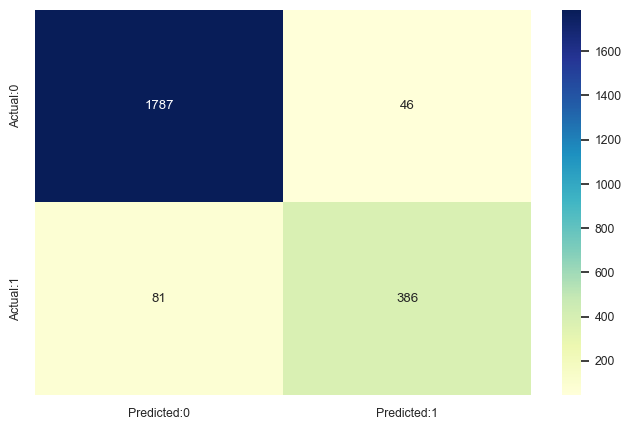

In [75]:
# Confusion Matrix
cm = confusion_matrix(y_test, dt_predict)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [76]:
# Classification Report
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1833
           1       0.89      0.83      0.86       467

    accuracy                           0.94      2300
   macro avg       0.93      0.90      0.91      2300
weighted avg       0.94      0.94      0.94      2300



In [77]:
# F1 Score
dt_f1 = f1_score(y_test, dt_predict)
print(f'F1 score: {round(dt_f1 * 100, 2)}%')

F1 score: 85.87%


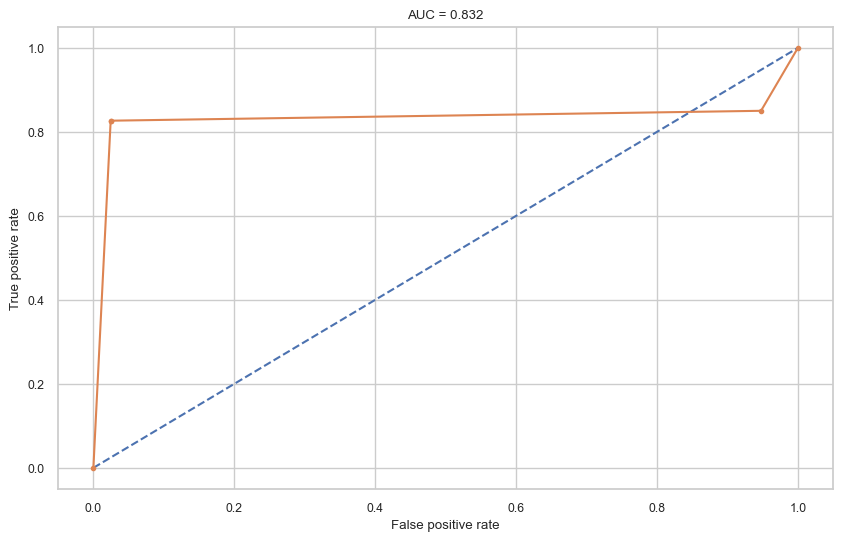

In [78]:
# ROC curve and AUC evaluation
probs = dt_clf.predict_proba(hybrid_features_test_scaled)
probs = probs[:, 1]
dt_auc = roc_auc_score(y_test, probs)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(dt_auc, 3)}")
plt.show()

### 4.3.3 Random Forest (RF)

In [79]:
from sklearn.ensemble import RandomForestClassifier
import joblib  # Import joblib directly
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Scale Hybrid features
sc_hybrid = StandardScaler()
hybrid_features_train_scaled = sc_hybrid.fit_transform(hybrid_features_train)
hybrid_features_test_scaled = sc_hybrid.transform(hybrid_features_test)

# Grid search for optimum parameters
param_grid = {'n_estimators': [50, 100],
              'max_depth': [5, 10]}
rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)

In [80]:
# Train the model
print("Training Random Forest Classifier...")
rf_clf.fit(hybrid_features_train_scaled, y_train)
print("Training completed.")

Training Random Forest Classifier...
Training completed.


In [81]:
# Print the best parameters
print("Best parameters found:", rf_clf.best_params_)

Best parameters found: {'max_depth': 10, 'n_estimators': 100}


In [82]:
# Save the trained RF model
joblib.dump(rf_clf, 'rf_esr_model.joblib')

['rf_esr_model.joblib']

In [83]:
# Load the saved RF model
loaded_rf_clf = joblib.load('rf_esr_model.joblib')

In [84]:
# Predictions
rf_predict = loaded_rf_clf.predict(hybrid_features_test_scaled)

In [85]:
# Accuracy
rf_accuracy = accuracy_score(y_test, rf_predict)
print(f"Accuracy: {round(rf_accuracy * 100, 2)}%")

Accuracy: 97.17%


<AxesSubplot:>

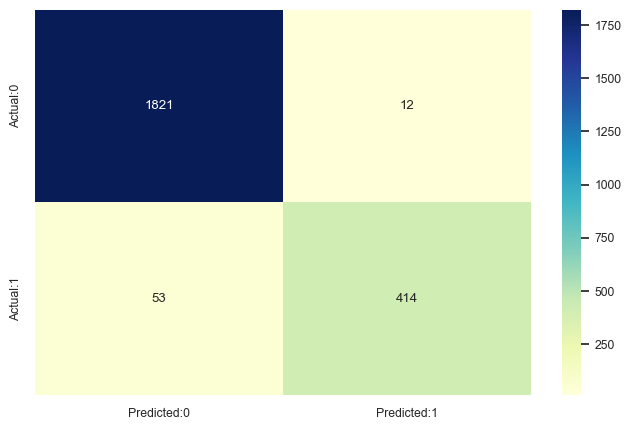

In [86]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_predict)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [87]:
# Classification Report
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1833
           1       0.97      0.89      0.93       467

    accuracy                           0.97      2300
   macro avg       0.97      0.94      0.95      2300
weighted avg       0.97      0.97      0.97      2300



In [88]:
# F1 Score
rf_f1 = f1_score(y_test, rf_predict)
print(f'F1 score: {round(rf_f1 * 100, 2)}%')

F1 score: 92.72%


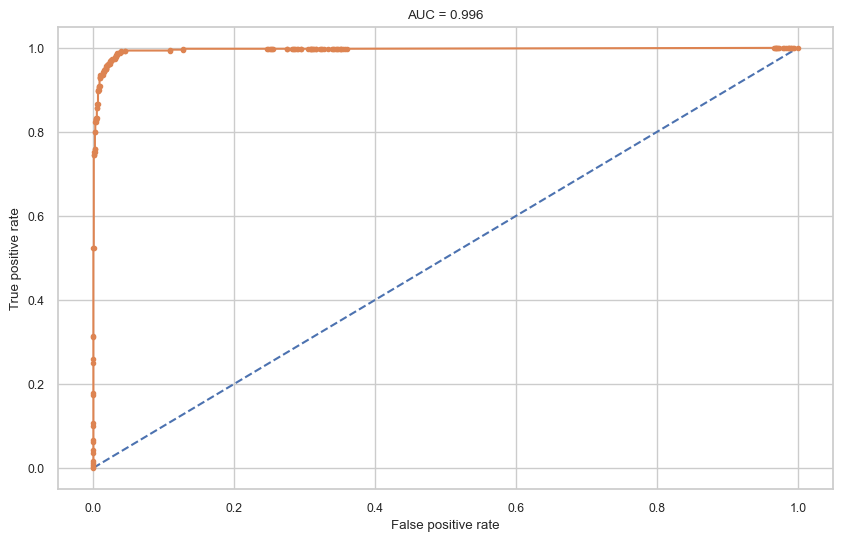

In [89]:
# ROC curve and AUC evaluation
probs = rf_clf.predict_proba(hybrid_features_test_scaled)
probs = probs[:, 1]
rf_auc = roc_auc_score(y_test, probs)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(rf_auc, 3)}")
plt.show()

### 4.3.4 K-Nearest Neighbors (KNN)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
import joblib  # Import joblib directly
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Scale Hybrid features
sc_hybrid = StandardScaler()
hybrid_features_train_scaled = sc_hybrid.fit_transform(hybrid_features_train)
hybrid_features_test_scaled = sc_hybrid.transform(hybrid_features_test)

# Grid search for optimum parameters
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance']}
knn_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)

In [91]:
# Train the model
print("Training K-Nearest Neighbors Classifier...")
knn_clf.fit(hybrid_features_train_scaled, y_train)
print("Training completed.")

Training K-Nearest Neighbors Classifier...


C:\Users\Gbenga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Gbenga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Gbenga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Gbenga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\Gbenga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Gbenga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Training completed.


In [92]:
# Print the best parameters
print("Best parameters found:", knn_clf.best_params_)

Best parameters found: {'n_neighbors': 3, 'weights': 'distance'}


In [93]:
# Save the trained KNN model
joblib.dump(knn_clf, 'knn_esr_model.joblib')

['knn_esr_model.joblib']

In [94]:
# Load the saved KNN model
loaded_knn_clf = joblib.load('knn_esr_model.joblib')

In [95]:
# Predictions
knn_predict = loaded_knn_clf.predict(hybrid_features_test_scaled)

In [96]:
# Accuracy
knn_accuracy = accuracy_score(y_test, knn_predict)
print(f"Accuracy: {round(knn_accuracy * 100, 2)}%")

Accuracy: 92.13%


<AxesSubplot:>

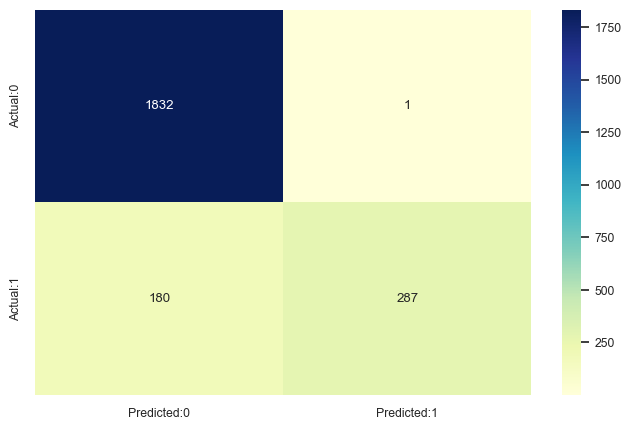

In [97]:
# Confusion Matrix
cm = confusion_matrix(y_test, knn_predict)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [98]:
# Classification Report
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1833
           1       1.00      0.61      0.76       467

    accuracy                           0.92      2300
   macro avg       0.95      0.81      0.86      2300
weighted avg       0.93      0.92      0.91      2300



In [99]:
# F1 Score
knn_f1 = f1_score(y_test, knn_predict)
print(f'F1 score: {round(knn_f1 * 100, 2)}%')


F1 score: 76.03%


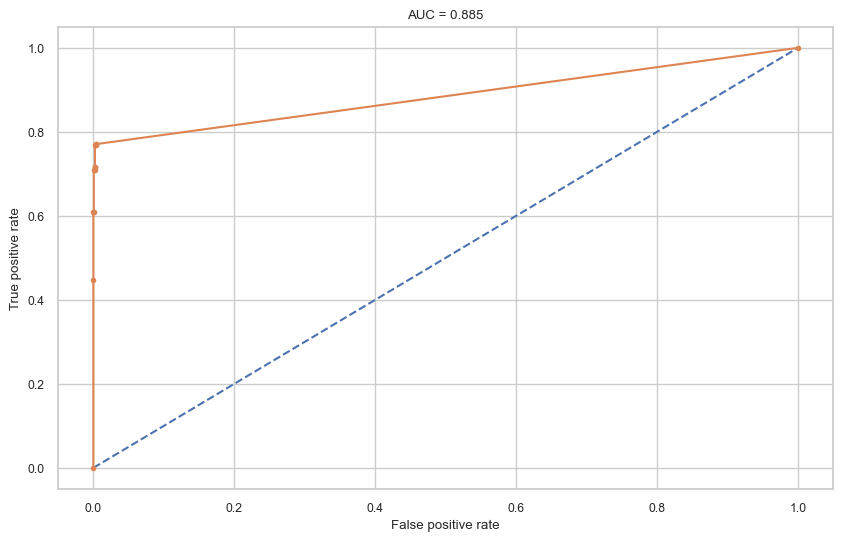

In [100]:
# ROC curve and AUC evaluation
probs = knn_clf.predict_proba(hybrid_features_test_scaled)
probs = probs[:, 1]
knn_auc = roc_auc_score(y_test, probs)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc, 3)}")
plt.show()

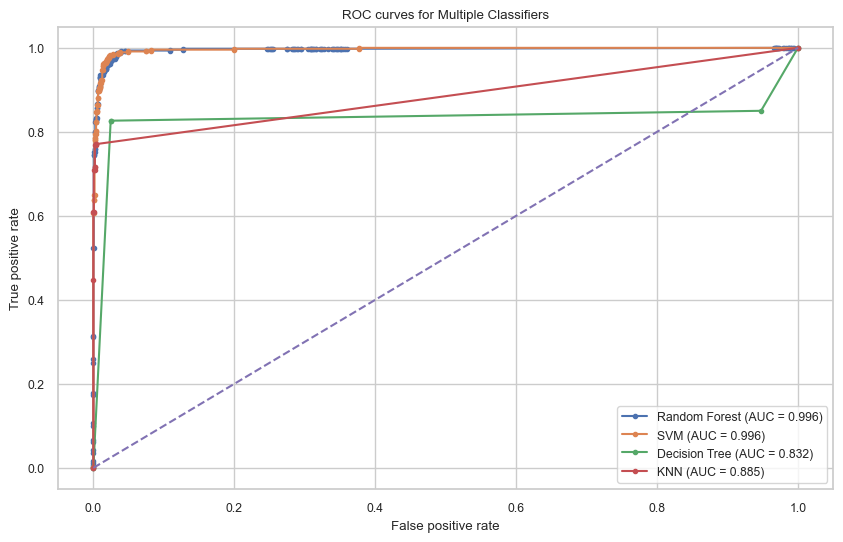

In [101]:
# Define a list of classifiers or models: rf_clf, svm_clf, dt_clf, knn_clf
classifiers = [rf_clf, svm_clf, dt_clf, knn_clf]
clf_names = ['Random Forest', 'SVM', 'Decision Tree', 'KNN']  # Names of the classifiers

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

for clf, name in zip(classifiers, clf_names):
    probs = clf.predict_proba(hybrid_features_test_scaled)
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs)
    
    plt.plot(fpr, tpr, marker='.', label=f"{name} (AUC = {round(auc, 3)})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curves for Multiple Classifiers')
plt.legend()
plt.show()

Title: ROC Curves Comparison for Multiple Classifiers
    
This chart illustrates the Receiver Operating Characteristic (ROC) curves for various classifiers (Random Forest, SVM, Decision Tree, and KNN) used in the analysis. Each curve represents the trade-off between true positive rates and false positive rates, showcasing the comparative performance in terms of Area Under the Curve (AUC), where higher AUC values indicate better classifier performance in distinguishing between classes

## 4.4 Model Metrics: Comparison

In [102]:
# For each model, calculate metrics and store in variables

# SVM
svm_metrics = {
    'Accuracy': svm_accuracy,
    'AUC': svm_auc,
    'F1 score': svm_f1
}

# Decision Trees
tree_metrics = {
    'Accuracy': dt_accuracy,
    'AUC': dt_auc,
    'F1 score': dt_f1
}

# Random Forest
rf_metrics = {
    'Accuracy': rf_accuracy,
    'AUC': rf_auc,
    'F1 score': rf_f1
}

# KNN
knn_metrics = {
    'Accuracy': knn_accuracy,
    'AUC': knn_auc,
    'F1 score': knn_f1
}

In [103]:
# Create a DataFrame to compare metrics
comparison = pd.DataFrame({
    "Support Vector Machine": svm_metrics,
    "Decision Trees": tree_metrics,
    "Random Forest": rf_metrics,
    "K-Nearest Neighbours": knn_metrics
}).T

In [104]:
comparison

,Accuracy,AUC,F1 score
Support Vector Machine,0.973043,0.996167,0.930804
Decision Trees,0.944783,0.832430,0.858732
Random Forest,0.971739,0.995636,0.927212
K-Nearest Neighbours,0.921304,0.884751,0.760265


In [105]:
# Calculate the average of the three metrics for each model
comparison['Average of the 3 metrics'] = comparison.mean(axis=1)
comparison

,Accuracy,AUC,F1 score,Average of the 3 metrics
Support Vector Machine,0.973043,0.996167,0.930804,0.966671
Decision Trees,0.944783,0.832430,0.858732,0.878648
Random Forest,0.971739,0.995636,0.927212,0.964862
K-Nearest Neighbours,0.921304,0.884751,0.760265,0.855440


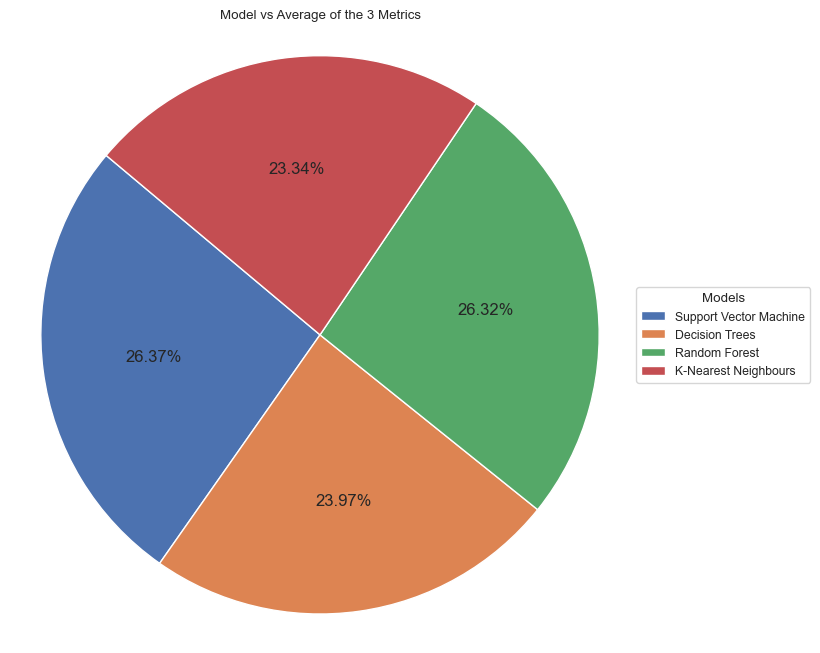

In [106]:
# Performance Visualization - Pie Chart
models = comparison.index
average_metrics = comparison['Average of the 3 metrics']

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges, _, autotexts = plt.pie(average_metrics, labels=[''] * len(models), autopct='%1.2f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Model vs Average of the 3 Metrics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(models, title='Models', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust label font size
for autotext in autotexts:
    autotext.set_fontsize(12)

# Show the pie chart
plt.show()

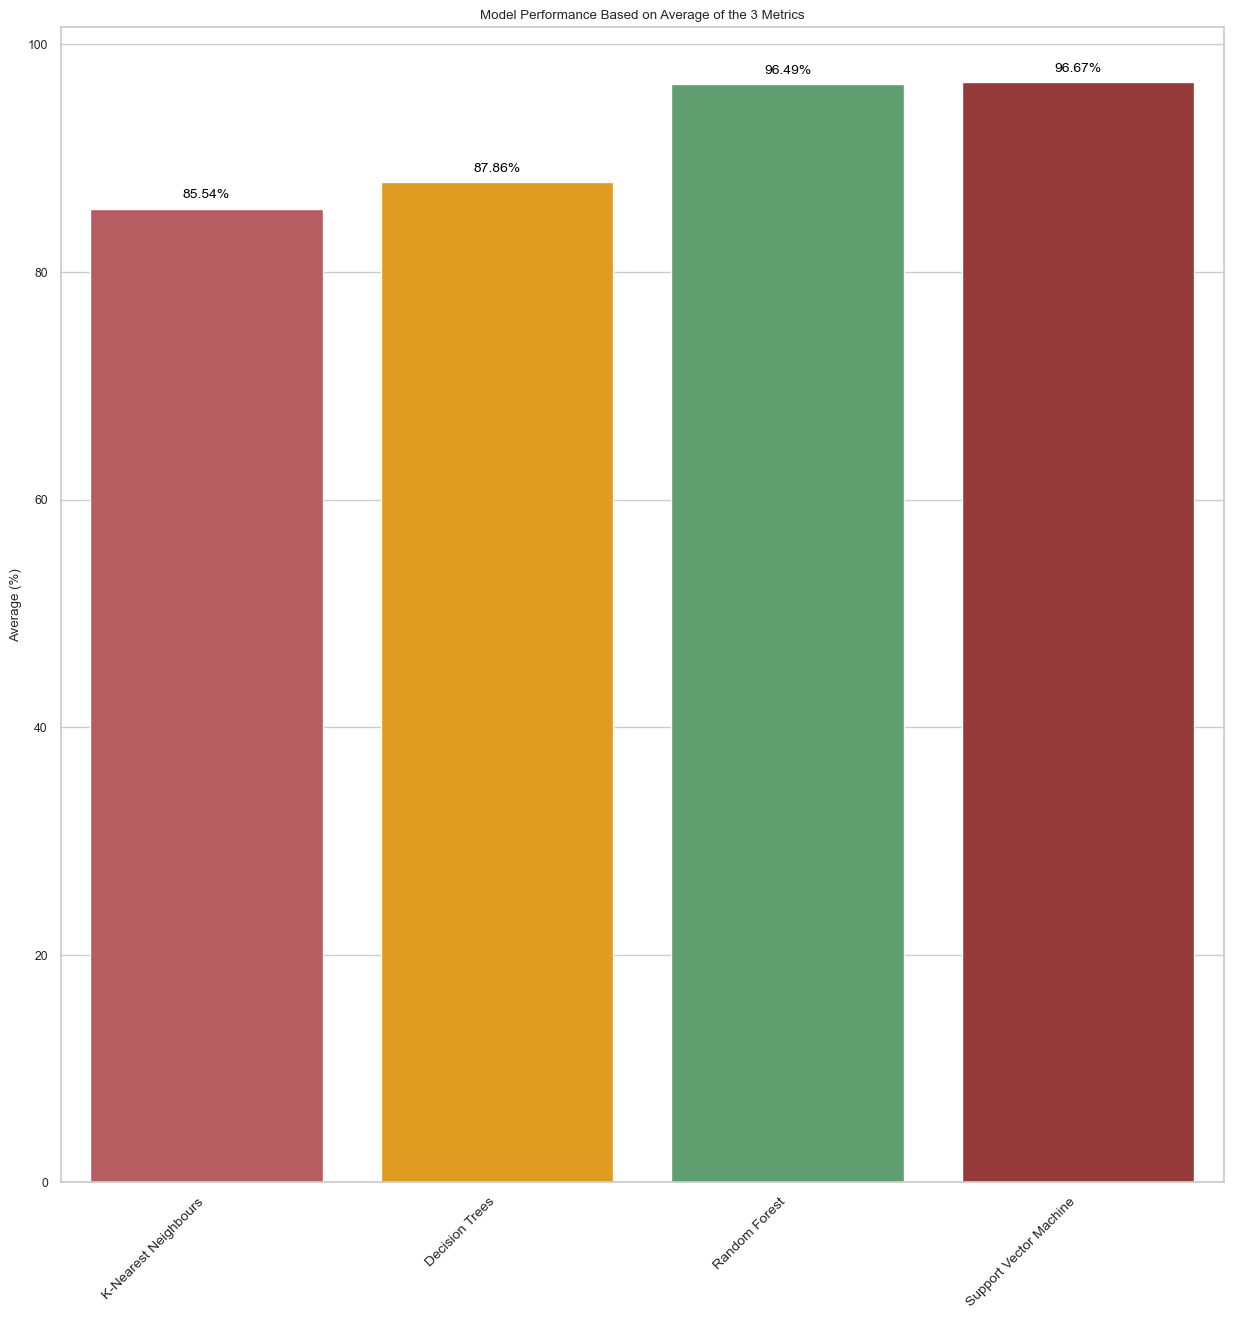

In [107]:
# Performance Visualization - Bar Chart
# Calculate the average of the 3 metrics
comparison['Average (%)'] = comparison.mean(axis=1) * 100

# Sort the data in ascending order
sorted_comparison = comparison.sort_values(by='Average (%)')

# Define custom colors for each model
n = len(sorted_comparison)
colors = ['r', 'orange', 'g', 'brown']

# Create a bar plot with average % on each bar using the custom colors
plt.figure(figsize=(15, 15))
ax = sns.barplot(x=sorted_comparison.index, y='Average (%)', data=sorted_comparison, palette=colors)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add the average % values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Model Performance Based on Average of the 3 Metrics')
plt.show()

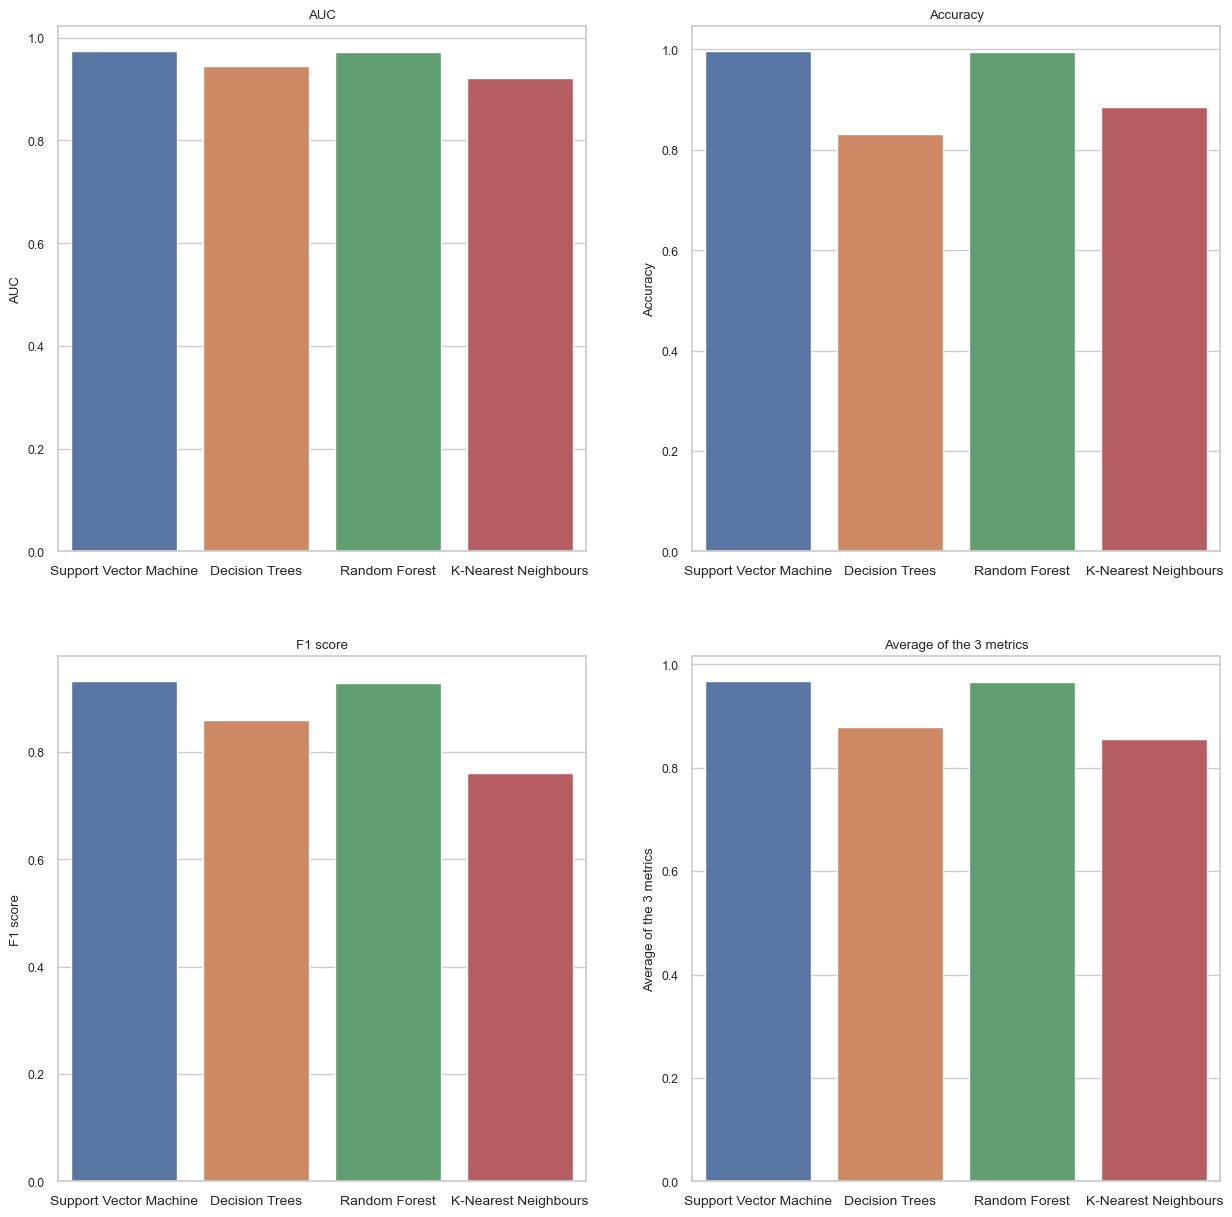

In [108]:
# Comparison of all metrics
titles = ['AUC', 'Accuracy', 'F1 score', 'Average of the 3 metrics']

fig = plt.gcf()
fig.set_size_inches(15, 15)

for title, label in enumerate(comparison.columns[:4]):  # Limit to four subplots
    plt.subplot(2, 2, title + 1)
    sns.barplot(x=comparison.index, y=comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])

# Fix labels
for i, ax in enumerate(fig.axes):
    ax.set_ylabel(titles[i])  # Use titles for y-axis labels

plt.show()

### 4.5 Outcome

Observations and Improvements:

Support Vector Machine (SVM): Shows marginal improvements in all metrics after applying data balancing and feature selection techniques, with an increase in accuracy, AUC, and F1 score.

Decision Trees (DT): Despite minor improvements in accuracy and AUC, the F1 score and the average of the three metrics show a noticeable increase after employing the techniques.

Random Forest (RF): Similar to SVM, minor but consistent enhancements across all metrics are observed.

K-Nearest Neighbours (KNN): Although the accuracy dropped slightly, there's a substantial improvement in the F1 score and the average of the three metrics, signifying a more balanced model performance.

Overall Improvement: The application of data balancing and hybrid feature selection techniques demonstrates improvements across most models, enhancing the overall predictive performance in various aspects, notably in the F1 score and the average of the three metrics.


# 5. Graphic User Interface (GUI)

This will be implemented in a separate code and in another Jupyter Notebook

# 6. Conclusion

The aim of this study is to detect epileptic seizure using two combine feature selection techniques and comparison performance of various machine learning algorithms.

Based on the evaluation metrics, the Support Vector Machine (SVM) and Random Forest models performed exceptionally well, showcasing high accuracy, AUC, and F1 scores. 

These models demonstrated strong predictive capability, with SVM slightly outperforming the Random Forest model by a marginal average of the three metrics. 

Decision Trees, although showing decent performance, slightly lagged behind SVM and Random Forest in terms of AUC and F1 score. K-Nearest Neighbours, while being the weakest performer among the models assessed, still managed a fair level of accuracy but lacked in AUC and F1 score, making it less desirable for this specific classification task. 

Overall, both SVM and Random Forest models present as suitable candidates for deployment, considering their robust performance across multiple evaluation metrics.